# Latar Belakang

Perusahaan taksi di New York City menghadapi sejumlah tantangan, termasuk peningkatan kepuasan pelanggan, optimasi operasional, dan pemahaman mendalam mengenai dinamika pembayaran penumpang. Dalam upaya mengatasi tantangan tersebut, perusahaan berencana melakukan analisis mendalam terhadap data set New York City TLC Trip Record. Fokus analisis melibatkan perbandingan kepuasan pelanggan antara dua vendor utama, eksplorasi pola perjalanan taksi, dan evaluasi hubungan antara jumlah total pembayaran dan tip. Dalam rangka mencapai tujuan tersebut, stakeholders utama seperti perusahaan taksi, pelanggan, pengemudi taksi, dan pemerintah Kota New York akan terlibat aktif. Langkah-langkah ini diambil dengan harapan meningkatkan kualitas layanan, efisiensi operasional, dan pemahaman mendalam terkait interaksi pembayaran penumpang.

# Rumusan Masalah

Berdasarkan latar belakang diatas, stekholder diatas ingin mengetahui beberapa informasi berikut :

1. Bagaimana perbandingan kepuasan pelanggan antara Vendor Creative Mobile Technologies, LLC (VendorID 1) dan Vendor VeriFone Inc. (VendorID 2), berdasarkan parameter total jarak perjalanan,total jumlah pendapatan, dan total jumlah tip yang penumpang?

2. Bagaimana pola perjalanan taksi mencerminkan tren permintaan penumpang di Bulan Januari 2023?

3. Apakah terdapat hubungan yang signifikan antara jumlah bayar (total_amount) dan jumlah tip (tip_amount) yang diberikan oleh penumpang kepada pengemudi taksi?

# Tujuan Analisis

Berdasarkan latar belakang dan rumusan masalah diatas, berikut adalah tujuan analisis yang tepat:

1. **Perbandingan Kepuasan Pelanggan antara Vendor:**
   - Mengidentifikasi perbedaan kepuasan pelanggan antara dua vendor utama (Creative Mobile Technologies, LLC dan VeriFone Inc.) berdasarkan parameter:
     - Total jarak perjalanan.
     - Total jumlah pendapatan.
     - Total jumlah tip yang diterima oleh pengemudi.

2. **Pemahaman Pola Perjalanan Taksi untuk Tren Permintaan Penumpang di Januari 2023:**
   - Menganalisis pola perjalanan taksi untuk memahami tren permintaan penumpang selama bulan Januari 2023. Fokus pada:
     - Distribusi waktu perjalanan.
     - Tren permintaan penumpang berdasarkan jumlah penumpang

3. **Evaluasi Hubungan antara Pembayaran Total dan Tips:**
   - Mengevaluasi apakah terdapat hubungan yang signifikan antara jumlah total pembayaran (total_amount) yang diterima oleh perusahaan taksi dan jumlah tip (tip_amount) yang diberikan oleh penumpang kepada pengemudi.


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset New York City TLC Trip Record memiliki berbagai kolom yang menyimpan informasi terkait perjalanan taksi di New York City. Di bawah ini adalah beberapa kolom dalam dataset beserta penjelasannya:

1. VendorID: ID vendor yang menyediakan layanan taksi.
    
	1 = Creative Mobile Technologies, LLC
	
	2 = VeriFone Inc

2. lpep_pickup_datetime: Waktu dan tanggal penjemputan penumpang.

3. lpep_dropoff_datetime: Waktu dan tanggal penurunan penumpang.

4. store_and_fwd_flag: Menunjukkan apakah data perjalanan disimpan terlebih dahulu sebelum dikirim ke vendor.
    
	Y = menyimpan dan meneruskan perjalanan
	
	N = bukan perjalanan simpan dan maju

5. RatecodeID: Kode tarif yang digunakan selama perjalanan.
    
	1 = Tarif standar
	
	2 = JFK
	
	3 = Taman Baru
	
	4 = Nassau atau Westchester
	
	5 = Tarif yang dinegosiasikan
	
	6 = Perjalanan berkelompok

6. PULocationID: ID lokasi penjemputan.

7. DOLocationID: ID lokasi tujuan.

8. passenger_count: Jumlah penumpang dalam taksi. Ini adalah nilai yang dimasukkan oleh driver

9. trip_distance: Jarak perjalanan dalam mil yang dilaporkan oleh agrometer

10. fare_amount: Jumlah biaya dasar perjalanan taksi.

11. extra: Biaya tambahan seperti biaya malam atau biaya hari libur.

12. mta_tax: Biaya pajak MTA. Pajak MTA $0,50 yang dipicu secara otomatis berdasarkan pada tarif meteran yang digunakan.

13. tip_amount: Jumlah tip yang diberikan oleh penumpang. secara otomatis diisi untuk kartu kredit tip. Tip tunai tidak termasuk.

14. tolls_amount: Biaya tol selama perjalanan.

15. ehail_fee: Biaya e-hail jika digunakan.

16. improvement_surcharge: Biaya tambahan perbaikan sebesar $0,30. Biaya tambahan perbaikan mulai diterapkan dipungut pada tahun 2015.

17. total_amount: Jumlah total pembayaran yang dibebankan kepada penumpang. Tidak termasuk tip uang tunai

18. payment_type: Metode pembayaran yang digunakan oleh penumpang.
	
	1 = Kartu kredit
	
	2 = Uang tunai
	
	3 = Tanpa biaya
	
	4 = Sengketa
	
	5 = Tidak diketahui
	
	6 = Perjalanan dibatalkan

19. trip_type: Tipe perjalanan (biasanya berdasarkan aturan lokal). 
	
	1 = Melambaikan tangan (Memesan taksi di jalan)
	
	2 = Pesan secara online

20. congestion_surcharge: Biaya tambahan terkait kemacetan.


Berikut informasi mengenai kolom apa saja yang tersedia dalam dataset NYC TLC TRIP Record

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset NYC TLC Trip Record

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
# Menampilkan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

## Missing Value

In [6]:
df.isna().sum()

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
dtype: int64

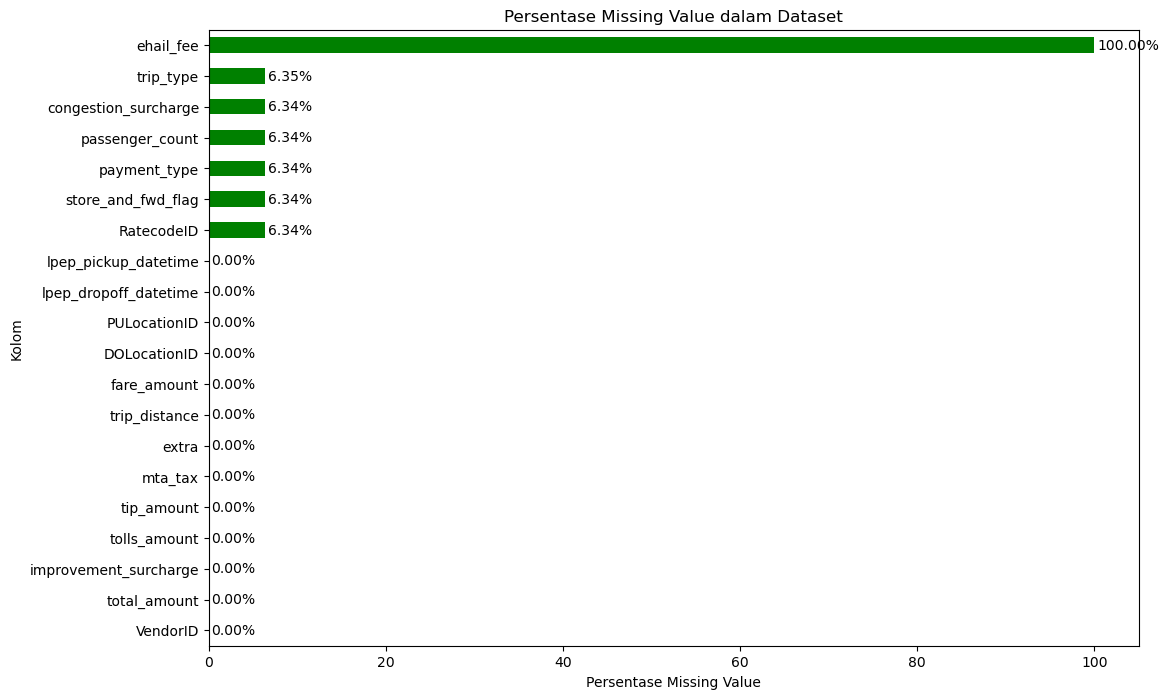

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

# Sebaran missing value di dalam data
missing_values_count = df.isna().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Visualisasi menggunakan horizontal bar plot untuk sebaran missing value
plt.figure(figsize=(12, 8))
ax = missing_values_percentage.sort_values().plot(kind='barh', color='green')
plt.title('Persentase Missing Value dalam Dataset')
plt.xlabel('Persentase Missing Value')
plt.ylabel('Kolom')
for i, v in enumerate(missing_values_percentage.sort_values()):
    ax.text(v + 0.3, i, f'{v:.2f}%', color='black', ha='left', va='center')
plt.show()

## Data Duplikat

In [8]:
df.duplicated().sum()

0

Secara umum, kita bisa melihat bahwa:

1. Dataset NYC TLC Trip Record memiliki 20 kolom dan 68211 baris
2. Terdapat *missing value* pada 7 kolom yang ada dalam dataset
3. Kolom `ehail_fee` memiliki memiliki 100% nilai yang hilang. Kolom ini mungkin tidak memberikan informasi yang berguna karena seluruh kolom kosong.
4. Kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` memiliki sekitar (6.34% - 6.35%) nilai yang hilang. Meskipun persentasenya tidak terlalu tinggi, tetapi karena sejumlah kolom tedampak, maka perlu tindakan untuk menangani missing value tersebut.
3. Kolom `VendorID`, `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PULocationID`, `DOLocationID`, `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount` tidak memiliki nilai yang hilang (0%). Data lengkap untuk kolom-kolom ini, namun akan diperiksan terlebih dahulu apakah nilainya sudah sesuai dengan kategori yang diharapkan.
4. Tidak terdapat data duplikat
5. Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` saat ini memiliki tipe data object. Ini mungkin perlu diubah menjadi tipe data datetime untuk memfasilitasi analisis waktu yang lebih baik.

Selanjutnya untuk mengatasi *missing value* perlu dilakukan
1. Hapus baris/kolom yang berisi **missing value**. Kolom `'ehail_fee'` memiliki presentase 100% **missing value**, maka sebaiknya kolom ini dihapus.
2. Mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*


# Cleaning Data

In [9]:
# kolom yang numerikal yang akan dianalisis
numericals = ['total_amount', 'trip_distance', 'tip_amount', 'passenger_count' ]

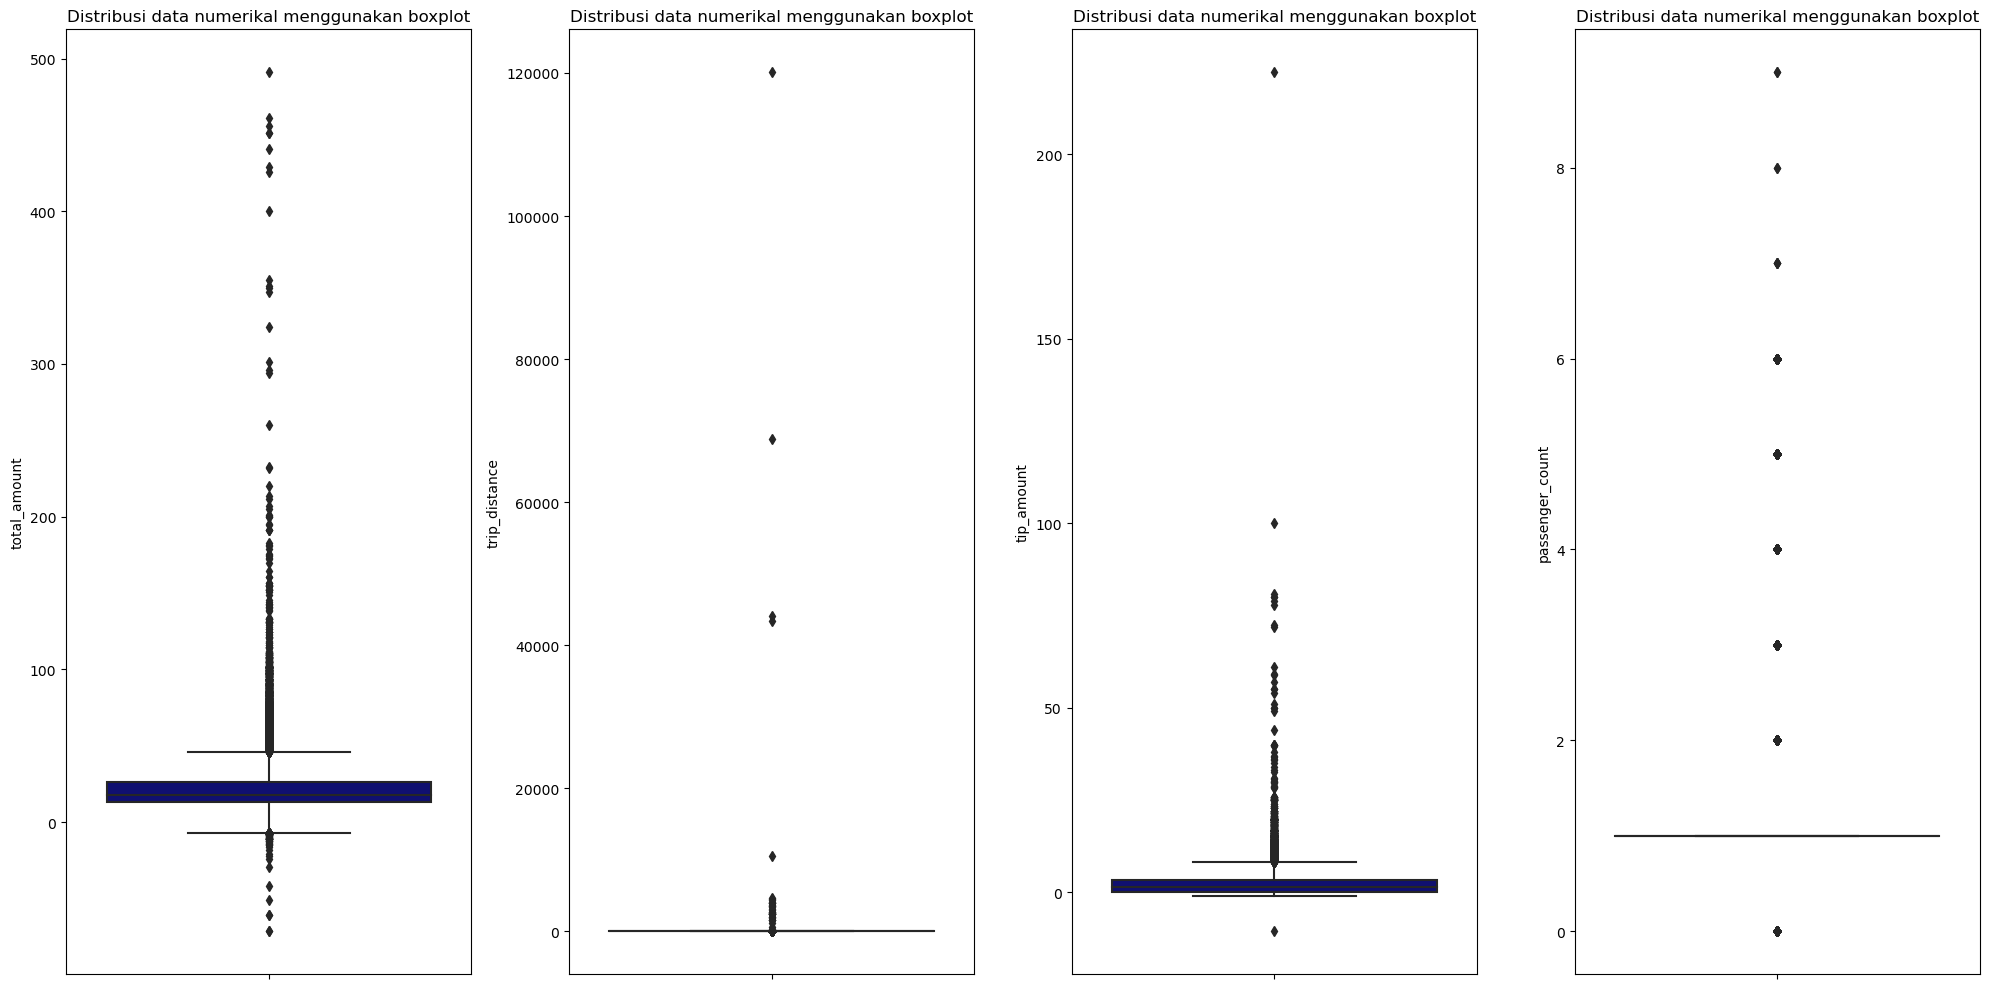

In [10]:
# menampilkan distribusi data menggunakan boxplot
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color = 'navy', orient = 'v')
    plt.tight_layout()
    plt.title('Distribusi data numerikal menggunakan boxplot')

plt.show()

### a. Menangani Data Anomali

Berdasarkan gambaran kasar anomali di dalam data diatas, mari kita lihat dan tangani tiap-tiap anomali secara lebih detail.

Sebelum memulai, mari kita ubah data kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang saat ini memiliki tipe data object, menjadi tipe data datetime untuk memfasilitasi analisis waktu yang lebih baik.

In [11]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
print(df.dtypes)

VendorID                 int64         
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag       object        
RatecodeID               float64       
PULocationID             int64         
DOLocationID             int64         
passenger_count          float64       
trip_distance            float64       
fare_amount              float64       
extra                    float64       
mta_tax                  float64       
tip_amount               float64       
tolls_amount             float64       
ehail_fee                float64       
improvement_surcharge    float64       
total_amount             float64       
payment_type             float64       
trip_type                float64       
congestion_surcharge     float64       
dtype: object


In [12]:
# mengekstrak hari pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama hari dari setiap transaksi
df['day'] = df['lpep_pickup_datetime'].dt.day_name()

# mengekstrak jam pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan jam dari setiap transaksi
df['hour'] = df['lpep_pickup_datetime'].dt.hour

# mengekstrak bulan pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama bulan dari setiap transaksi
df['month'] = df['lpep_pickup_datetime'].dt.month

#### Menghapus anomali pada kolom `RatecodeID`

Terdapat anomali pada kolom 'RatecodeID' yaitu terdapat nilai '99', padahal merujuk pada dictionary kolom 'RatecodeID' hanya terdapat nilai 1 - 6 sebagai berikut :

	1 = Tarif standar
	2 = JFK
	3 = Taman Baru
	4 = Nassau atau Westchester
	5 = Tarif yang dinegosiasikan
	6 = Perjalanan berkelompok

Maka baris yang 'RatecodeID' nya bernilai 99 akan dilakukan tindakan berupa penghapusan.

In [13]:
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,...,0.0,NaN,1.0,19.7,1.0,NaN,0.0,Sunday,19,1
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,...,0.0,NaN,1.0,25.0,1.0,NaN,0.0,Monday,16,1
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,...,0.0,NaN,1.0,29.7,1.0,NaN,0.0,Thursday,20,1
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,...,0.0,NaN,1.0,24.0,1.0,NaN,0.0,Sunday,11,1
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,...,0.0,NaN,1.0,25.7,1.0,NaN,0.0,Sunday,13,1
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Sunday,17,1
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Thursday,1,1
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,...,0.0,NaN,1.0,41.7,1.0,NaN,0.0,Thursday,17,1
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Saturday,20,1
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,...,0.0,NaN,1.0,51.7,1.0,NaN,0.0,Monday,13,1


In [14]:
# hapus data anomali
df = df.drop(df[df.RatecodeID == 99].index)

#### Menangani anomali pada 'total_amount'

Terdapat anomali pada kolom `total_amount` < 0 yaitu bernilai negatif. maka baris yang nilainya negatif akan dilakukan tindakan berupa penghapusan pada baris tersebut.

In [15]:
df.drop(df.index[df['total_amount'] < 0 ], inplace=True)
df[df['total_amount'] < 0 ].count()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
day                      0
hour                     0
month                    0
dtype: int64

#### Menangani anomali pada 'trip_distance'

In [16]:
# Filter data dengan trip_distance < 100 mil
filtered_data = df[df['trip_distance'] < 100]

# Tampilkan kolom trip_distance dan total_amount
result = filtered_data[['trip_distance', 'total_amount']]

# Cetak hasil
print(result)


       trip_distance  total_amount
0      2.58           24.18       
1      1.81           15.84       
2      0.00           11.64       
3      1.30           10.20       
4      1.10           8.00        
...     ...            ...        
68205  3.92           25.02       
68207  2.14           5.41        
68208  3.44           21.04       
68209  3.03           19.18       
68210  5.82           29.40       

[67985 rows x 2 columns]


In [17]:
# Filter data dengan trip_distance > 100 mil
filtered_data = df[df['trip_distance'] > 100].head(100)

# Tampilkan kolom trip_distance dan total_amount
result = filtered_data[['trip_distance', 'total_amount']]

# Cetak hasil
print(result)

       trip_distance  total_amount
33373  1571.97        43.31       
63995  579.63         37.08       
64446  2555.47        27.92       
64558  3077.89        17.02       
64572  2606.52        13.20       
64609  43392.12       15.62       
64695  137.95         49.94       
64947  2446.53        31.98       
64954  2027.31        22.64       
65149  1082.45        51.75       
65194  120098.84      52.57       
65277  2645.65        15.82       
65306  3965.74        59.61       
65452  1592.66        81.08       
65491  2378.17        18.54       
65725  3515.74        15.62       
65846  10480.36       25.21       
66337  1802.82        17.82       
66344  2635.30        30.76       
66452  4389.24        13.30       
66566  2367.12        34.25       
66580  254.65         55.74       
66581  44003.31       27.13       
66713  4502.86        27.68       
66724  3508.51        41.06       
66804  2011.26        20.27       
66811  3940.97        17.57       
66842  3981.90      

berdasarkan infomasi [aturan tarif](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page). Terdapat anomali pada kolom `'trip_distance'` 0 mill dan > 100 mill karena total_amount nya tidak masuk akal. Maka baris yang 'trip_distance'nya < 1 dan > 100 mil akan dilakukan tindakan berupa penghapusan baris tersebut.

In [18]:
# Menghapus baris dengan 'trip_distance' lebih dari 100 mil
df.drop(df.index[df['trip_distance'] > 100], inplace=True)

# Menghapus baris dengan 'trip_distance' kurang dari 1
df.drop(df.index[df['trip_distance'] < 1], inplace=True)


In [19]:
print(df['trip_distance'].describe())

count    54087.000000
mean     3.229742    
std      2.882855    
min      1.000000    
25%      1.530000    
50%      2.280000    
75%      3.760000    
max      66.180000   
Name: trip_distance, dtype: float64


#### Menangani anomali pada 'total_amount'

In [20]:
#Cek distribusi kolom 'total_amount'

from scipy.stats import shapiro
_, p_value = shapiro(df['total_amount'])
print(f"P-value: {p_value}")


P-value: 0.0


berdasarkan infomasi [aturan tarif](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page), dan informasi terkait dictionary `total_amount` serta datanya tidak terdistribusi normal maka kita akan menggunakan Interquartile Range (IQR) untuk mengidentifikasi dan menghapus outliers.

In [21]:
# Hitung IQR untuk kolom total_amount
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas IQR untuk mengidentifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang bukan outliers
df_filtered = df[(df['total_amount'] >= lower_bound) & (df['total_amount'] <= upper_bound)]

# Hitung kembali total_amount dengan komponen tarif yang sesuai
df_filtered['total_amount'] = (
    df_filtered['fare_amount'] +
    df_filtered['mta_tax'] +
    df_filtered['improvement_surcharge'] +
    df_filtered['tip_amount'] +
    df_filtered['tolls_amount']
)


In [22]:
print(df['total_amount'].describe())

count    54087.000000
mean     23.854820   
std      14.330138   
min      0.000000    
25%      15.000000   
50%      19.900000   
75%      28.020000   
max      349.600000  
Name: total_amount, dtype: float64


### Menangani anomali pada `passenger_count`

Berdasarkan [aturan maksimal jumlah penumpang](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page#), maksimal *penumpang* adalah sebesar 5 orang, dan tidak mungkin kosong jika nilai `total_amount` ada


In [23]:
# Check unique data kolom passenger_count
df['passenger_count'].value_counts()

passenger_count
1.0    42568
2.0    4071 
5.0    1448 
6.0    848  
3.0    754  
4.0    305  
0.0    241  
7.0    2    
Name: count, dtype: int64

In [24]:
# Mengecek total_amount pada passenger_count yang sama dengan 0
invalid_passenger_count = df[df['passenger_count'] == 0]['total_amount']

# Menampilkan hasil
print("Total Amount for Passenger Count 0:")
print(invalid_passenger_count)

Total Amount for Passenger Count 0:
254      16.80
446      12.10
486      18.80
487      14.85
623      19.65
         ...  
62192    24.10
62758    19.20
62903    25.20
63075    19.25
63247    19.25
Name: total_amount, Length: 241, dtype: float64


In [25]:
# Menghapus jumlah penumpang lebih dari 5 orang
df.drop(df.index[df['passenger_count'] > 5], inplace=True)
df['passenger_count'].value_counts()

# Mengganti nilai 0 pada jumlah penumpang dengan median
# Hitung median passenger_count (tanpa memasukkan nilai 0)
median_passenger_count = df[df['passenger_count'] > 0]['passenger_count'].median()

# Mengganti nilai 0 dengan median passenger_count
df['passenger_count'].replace(0, median_passenger_count, inplace=True)

In [26]:
# Check unique data kolom passenger_count
df['passenger_count'].value_counts()

passenger_count
1.0    42809
2.0    4071 
5.0    1448 
3.0    754  
4.0    305  
Name: count, dtype: int64

### b. Menghapus kolom `ehail_fee`

In [27]:
df.drop(columns=['ehail_fee'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53237 entries, 0 to 68210
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               53237 non-null  int64         
 1   lpep_pickup_datetime   53237 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  53237 non-null  datetime64[ns]
 3   store_and_fwd_flag     49387 non-null  object        
 4   RatecodeID             49387 non-null  float64       
 5   PULocationID           53237 non-null  int64         
 6   DOLocationID           53237 non-null  int64         
 7   passenger_count        49387 non-null  float64       
 8   trip_distance          53237 non-null  float64       
 9   fare_amount            53237 non-null  float64       
 10  extra                  53237 non-null  float64       
 11  mta_tax                53237 non-null  float64       
 12  tip_amount             53237 non-null  float64       
 13  tolls_

### c. Menangani Missing Value

### Menangani missing value pada kolom`store_and_fwd_flag`:

- Missing values pada kolom ini diisi dengan modus (nilai yang paling sering muncul). Pemilihan modus dapat dilakukan karena kolom ini berisi data kategorikal yang dapat diwakili oleh nilai yang paling umum.

In [28]:
# Cek jumlah nilai unik dalam kolom store_and_fwd_flag
unique_values = df['store_and_fwd_flag'].unique()
print(unique_values)

['N' 'Y' nan]


In [29]:
# Jika terdapat nilai yang hilang (NaN)
if df['store_and_fwd_flag'].isna().any():
    mode_value = df['store_and_fwd_flag'].mode().iloc[0]
    df['store_and_fwd_flag'].fillna(mode_value, inplace=True)

# Cek jumlah nilai unik dalam kolom store_and_fwd_flag setelah dilakukan imputasi
unique_values = df['store_and_fwd_flag'].unique()

print(unique_values)

['N' 'Y']


#### Menangani missing value pada kolom `RatecodeID`, `passenger_count`, `trip_type`, `congestion_surcharge` :

- Missing values pada kolom `RatecodeID` dan `trip_type` akan di isi dengan modus pada masing-masing kolom yang mungkin bersifat kategoris walaupun outputnya numerik, Pemilihan modus dapat memberikan interpretasi yang lebih mudah dimengerti. Nilai yang paling sering muncul seringkali memiliki interpretasi yang lebih jelas dan lebih relevan dengan konteks data.
- Missing values pada kolom `passenger_count` , `congestion_surcharge`  diisi dengan median masing-masing kolom. Median digunakan sebagai pengganti nilai tengah dari data numerik. Median lebih tahan terhadap outliers dibandingkan dengan mean atau mode, sehingga akan lebih stabil pada kasus data yang memiliki potensi outliers.

In [30]:
# Imputasi missing value RatecodeID
mode_ratecodeid = df['RatecodeID'].mode().iloc[0]  
df['RatecodeID'].fillna(mode_ratecodeid, inplace=True)

# Imputasi missing value trip_type
mode_trip_type = df['trip_type'].mode().iloc[0] 
df['trip_type'].fillna(mode_trip_type, inplace=True)

#imputasi missing value passenger_count
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)

#imputasi missing value congestion_surcharge
median_congestion_surcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

#### Menangani missing value pada kolom `payment_type` :

- Missing values pada kolom ini diisi dengan nilai 5.0.
- Pemilihan nilai 5.0 sebagai pengganti missing values karena merujuk bahwa tipe pembayaran tidak diketahui.

In [31]:
#imputasi missing value payment_type
#mengisi missing value dengan value 5 = tipe payment tidak diketahui
fill_payment_type = df['payment_type'].fillna(5.0, inplace=True)


In [32]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
day                      0
hour                     0
month                    0
dtype: int64

In [33]:
print(df.dtypes)

VendorID                 int64         
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag       object        
RatecodeID               float64       
PULocationID             int64         
DOLocationID             int64         
passenger_count          float64       
trip_distance            float64       
fare_amount              float64       
extra                    float64       
mta_tax                  float64       
tip_amount               float64       
tolls_amount             float64       
improvement_surcharge    float64       
total_amount             float64       
payment_type             float64       
trip_type                float64       
congestion_surcharge     float64       
day                      object        
hour                     int32         
month                    int32         
dtype: object


In [34]:
# Selanjutnya akan dibuat index, untuk reset index pada setiap barisnya
x = df.reset_index()
df =  x.drop(columns='index')

In [35]:
# Mengecek total_amount pada passenger_count yang sama dengan 0
invalid_passenger_count = df[df['passenger_count'] == 0]['total_amount']

# Menampilkan hasil
print("Total Amount for Passenger Count 0:")
print(invalid_passenger_count)


Total Amount for Passenger Count 0:
Series([], Name: total_amount, dtype: float64)


## Data Yang Akan Di Analisis

Untuk mempermudah komparasi atara vendor 1 dan vendor 2, maka dibuatkan variabel untuk masing - masing VendorId.

In [36]:
df_VendorID_1 = df[df['VendorID'] == 1]
df_VendorID_2 = df[df['VendorID'] == 2]

In [37]:
# Vendor Creative Mobile Technologies, LLC
df_VendorID_1 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.3,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0,1
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.1,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0,1
5,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.8,19.1,...,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Sunday,0,1
9,1,2023-01-01 00:16:12,2023-01-01 00:41:43,N,1.0,255,234,2.0,4.8,26.8,...,0.00,0.0,1.0,32.05,1.0,1.0,2.75,Sunday,0,1
14,1,2023-01-01 00:49:34,2023-01-01 01:08:23,N,1.0,195,210,1.0,11.3,32.5,...,0.00,0.0,1.0,34.50,2.0,1.0,0.00,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52940,1,2023-01-29 10:01:03,2023-01-29 10:10:54,N,1.0,74,166,1.0,2.8,12.8,...,2.86,0.0,1.0,17.16,5.0,1.0,0.00,Sunday,10,1
52976,1,2023-01-29 17:00:08,2023-01-29 17:14:38,N,1.0,74,142,1.0,3.7,17.7,...,3.29,0.0,1.0,25.24,5.0,1.0,0.00,Sunday,17,1
53019,1,2023-01-30 08:37:09,2023-01-30 08:43:47,N,1.0,74,41,1.0,1.2,6.5,...,0.80,0.0,1.0,8.80,5.0,1.0,0.00,Monday,8,1
53060,1,2023-01-30 12:58:41,2023-01-30 13:19:30,N,1.0,74,237,1.0,3.1,15.5,...,2.96,0.0,1.0,22.71,5.0,1.0,0.00,Monday,12,1


In [38]:
# Vendor VeruFone Inc
df_VendorID_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0,1
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Sunday,0,1
6,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.20,...,0.00,0.0,1.0,16.70,2.0,1.0,0.00,Sunday,0,1
7,2,2023-01-01 00:41:29,2023-01-01 00:46:26,N,1.0,41,166,2.0,1.11,7.20,...,1.00,0.0,1.0,10.70,1.0,1.0,0.00,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53232,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,21,1
53233,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,22,1
53234,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,23,1
53235,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,23,1


Data yang akan dilakukan analisis adalah data yang ada pada rentang waktu 01 - 01 2023 sampai 31 - 01 - 2023, sehingga data yang di luar rentang tersebut akan dihapus.

In [39]:
df[df['month'] != 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
227,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,0.00,0.00,0.3,16.80,2.0,1.0,0.00,Friday,14,12
245,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,0.00,6.55,0.3,35.60,2.0,1.0,2.75,Friday,14,12
19340,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,...,5.66,0.00,0.3,33.96,1.0,2.0,0.00,Wednesday,3,2


In [40]:
# Hapus data 
df = df.drop(df[df['month'] != 1].index)

In [41]:
# Buat kolom baru untuk menandai hari kerja (weekdays) dan akhir pekan (weekends)
df['weekdays'] = df['lpep_pickup_datetime'].dt.dayofweek
df['weekend'] = (df['weekdays'] >= 5).astype(int)

## **Data sudah bersih**

Selanjutnya akan ditampilkan informasi mengenai dataset yang sudah bersih seperti dibawah :

In [42]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].dtype, df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Data Type', 'Unique Sample'],
                     data=listItem)
pd.set_option('display.max_colwidth', 100)
tabelDesc

,Column Name,Number of Unique,Data Type,Unique Sample
0,VendorID,2,int64,"[2, 1]"
1,lpep_pickup_datetime,52298,datetime64[ns],"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 ..."
2,lpep_dropoff_datetime,52259,datetime64[ns],"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 ..."
3,store_and_fwd_flag,2,object,"[N, Y]"
4,RatecodeID,5,float64,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,195,int64,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7, 95, 260, 134, 223, 130, 258, 129, 116, 92, 42, 6..."
6,DOLocationID,245,int64,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 24, 244, 146, 1..."
7,passenger_count,5,float64,"[1.0, 2.0, 4.0, 5.0, 3.0]"
8,trip_distance,1732,float64,"[2.58, 1.81, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.0..."
9,fare_amount,2365,float64,"[14.9, 10.7, 6.5, 6.0, 17.7, 19.1, 14.2, 7.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12..."


In [43]:
lisPvalue = []
lisNormalitas = []
listKolom = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']

for i in listKolom :
    stat,pvalue=normaltest(df[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

In [44]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,passenger_count,0.0,Tidak terdistribusi normal
1,trip_distance,0.0,Tidak terdistribusi normal
2,fare_amount,0.0,Tidak terdistribusi normal
3,extra,0.0,Tidak terdistribusi normal
4,mta_tax,0.0,Tidak terdistribusi normal
5,tip_amount,0.0,Tidak terdistribusi normal
6,tolls_amount,0.0,Tidak terdistribusi normal
7,improvement_surcharge,0.0,Tidak terdistribusi normal
8,total_amount,0.0,Tidak terdistribusi normal
9,congestion_surcharge,0.0,Tidak terdistribusi normal


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53234 entries, 0 to 53236
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               53234 non-null  int64         
 1   lpep_pickup_datetime   53234 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  53234 non-null  datetime64[ns]
 3   store_and_fwd_flag     53234 non-null  object        
 4   RatecodeID             53234 non-null  float64       
 5   PULocationID           53234 non-null  int64         
 6   DOLocationID           53234 non-null  int64         
 7   passenger_count        53234 non-null  float64       
 8   trip_distance          53234 non-null  float64       
 9   fare_amount            53234 non-null  float64       
 10  extra                  53234 non-null  float64       
 11  mta_tax                53234 non-null  float64       
 12  tip_amount             53234 non-null  float64       
 13  tolls_

Total data dari dataset NYC TLC Trip Record awalnya adalah sebanyak 68.211, setelah dilakukan cleaning data, maka total data akhir adalah 53234. Sebanyak 14977 data telah dilakukan tindakan dengan menghapusnya, berdasarkan domain knowledge.

## **Menyimpan dataset NYC TLC Trip Record.csv yang sudah di cleaning ke dalam Excel**

In [46]:
#df.to_excel("NYC_TLC_Trip_Record_Cleaned.xlsx")

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis berdasarkan rumusan masalah yang telah ditetapkan.

### 1. Bagaimana perbandingan kepuasan pelanggan antara dua vendor utama, Creative Mobile Technologies, LLC (VendorID 1) dan VeriFone Inc. (VendorID 2), berdasarkan total jarak tempuh, total pembayaran, dan total tip pada bulan Januari 2023?

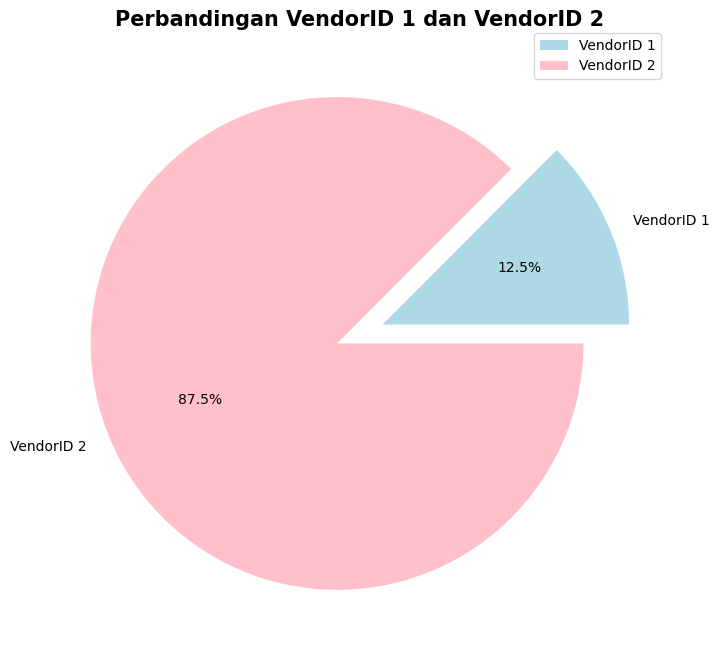

In [47]:
Count_VendorID_1 = df_VendorID_1['VendorID'].value_counts()

Count_VendorID_2 = df_VendorID_2['VendorID'].value_counts()

combined_counts = pd.concat([Count_VendorID_1, Count_VendorID_2])

labels = ['VendorID 1', 'VendorID 2']

plt.figure(figsize=(16, 8))
plt.pie(combined_counts, labels=labels, autopct='%1.1f%%',explode=[0.1,0.1],colors=['lightblue','pink'])


ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Perbandingan VendorID 1 dan VendorID 2", 
        ha='center', x=xmin+1.25, y=ymax*1.0, 
        fontsize=15, fontweight='bold', 
        color='black')

plt.legend()

plt.show()


Berdasarkan visualisasi piechart diatas dapat disimpulkan bahwa secara umum, VendorID 2 (VeriFone Inc) memiliki presentase jauh lebih banyak sebesar 87.5 % dibanding VendorID 1 (Creative Mobile Technologies, LLC) sebesar 12.5%

Untuk melihat insight dari masing masing vendor, selanjutnya akan di analisis berdasarkan parameter jumlah jarak perjalanan, jumlah pendapatan, serta jumlah tip.

## 1. Vendor ID 1 (Creative Mobile Technologies, LLC)

### Total jarak tempuh berdasarkan hari

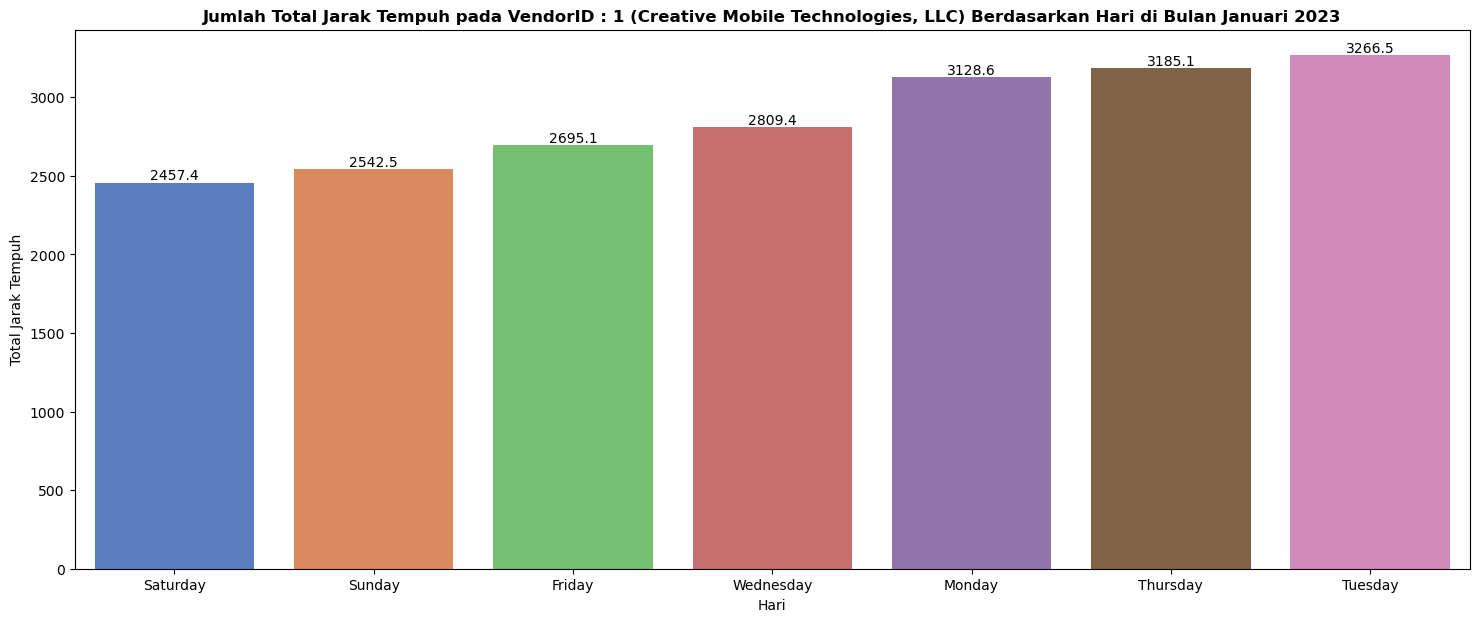

In [48]:
trip_distance_VendorID_1_by_day = df_VendorID_1[['trip_distance', 'day']].groupby('day').sum().sort_values('trip_distance').reset_index()
trip_distance_VendorID_1_by_day

plt.figure(figsize= (18, 7))

ax = sns.barplot(y= 'trip_distance',x='day', data= trip_distance_VendorID_1_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Total Jarak Tempuh')
plt.xlabel('Hari')

plt.title('Jumlah Total Jarak Tempuh pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total jarak tempuh yang di operasikan oleh VendorID 1 berada dalam rentang 2457.4 - 3266.5 mil berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana total jarak tempuh tertinggi sebesar 3266.5 mil yang dioperasikan oleh VendorID 1
- Hari Sabtu (Saturday) merupakan hari dimana total jarak tempuh terendah sebesar 24574 mil yang dioperasikan oleh VendorID 1

### Total Jarak Tempuh Berdasarkan Jam

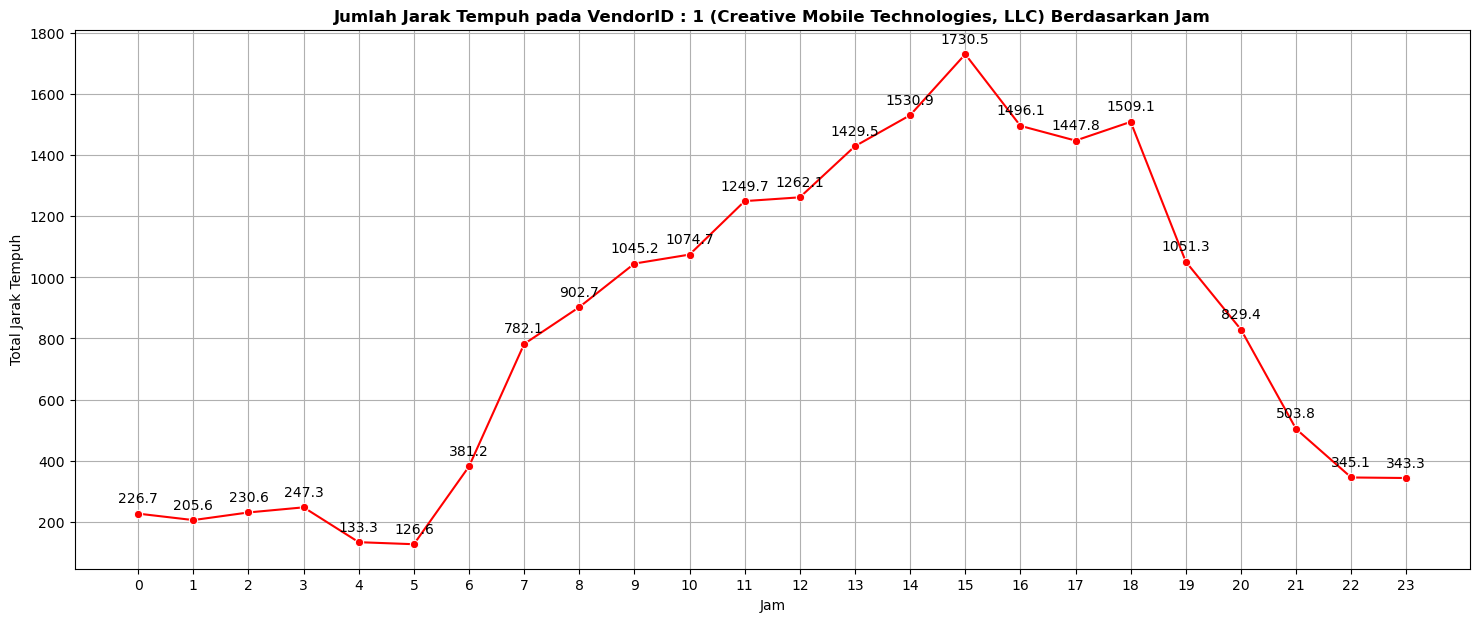

In [49]:
trip_distance_VendorID_1_by_hour = df_VendorID_1[['trip_distance', 'hour']].groupby('hour').sum().sort_values('trip_distance', ascending = False).reset_index()
trip_distance_VendorID_1_by_hour

#visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='trip_distance', x='hour', data=trip_distance_VendorID_1_by_hour, color='red', marker='o')


ax.set_xticks(trip_distance_VendorID_1_by_hour['hour'])
ax.set_xticklabels(trip_distance_VendorID_1_by_hour['hour'])

for x, y in zip(trip_distance_VendorID_1_by_hour['hour'], trip_distance_VendorID_1_by_hour['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Jarak Tempuh')
plt.title('Jumlah Jarak Tempuh pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Jam', fontweight = 'bold')
plt.grid()
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total jarak tempuh yang di operasikan oleh VendorID 1 berada dalam rentang 126.6 - 1730.5 mil berdasarkan jam pada bulan Januari 2023
- Pukul 15.00 merupakan waktu dengan total jarak tempuh tertinggi yaitu sebesar 1730.5 mil
- Pukul 05.00 merupakan waktu dengan total jarak tempuh terendah yaitu sebesar 126.6 mil
- Terlihat juga pada rentang pukul 05.00 - 15.00 terdapat fluktuasi kenaikan total jarak tempuh, sedangkan fluktuasi pada pukul 15.00 - 05.00 terlihat cenderung menurun, sempat terjadi sedikit peningkatan kecil pada pukul 17.00 - 18.00 dan pukul 01.00 - 03.00. Namun secara rata rata pada pukul tersebut, terjadi penurunan yang signifikan.

### Total Pendapatan Berdasarkan Hari

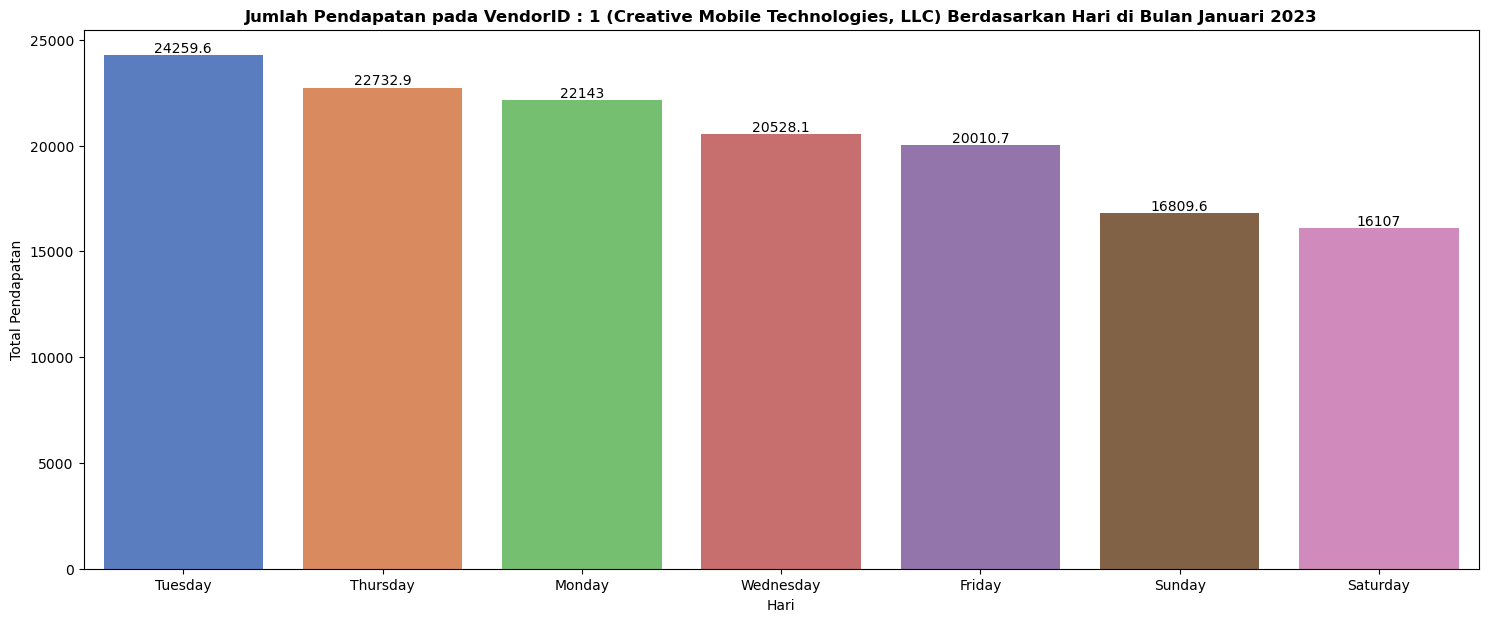

In [50]:
total_amount_VendorID_1_by_day = df_VendorID_1[['total_amount', 'day']].groupby('day').sum().sort_values('total_amount', ascending = False).reset_index()


plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'total_amount',x='day', data= total_amount_VendorID_1_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Total Pendapatan')
plt.xlabel('Hari')

plt.title('Jumlah Pendapatan pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total pendapatan yang di hasilkan oleh VendorID 1 berada dalam rentang 16107 - 24259.1 USD berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana pendapatan tertinggi sebesar 24259.1 USD yang hasilkan oleh VendorID 1
- Hari Sabtu (Saturday) merupakan hari dimana pendapatan total tarif terendah sebesar 16107 USD yang hasilkan oleh VendorID 1

### Total Pendapatan Berdasarkan Jam

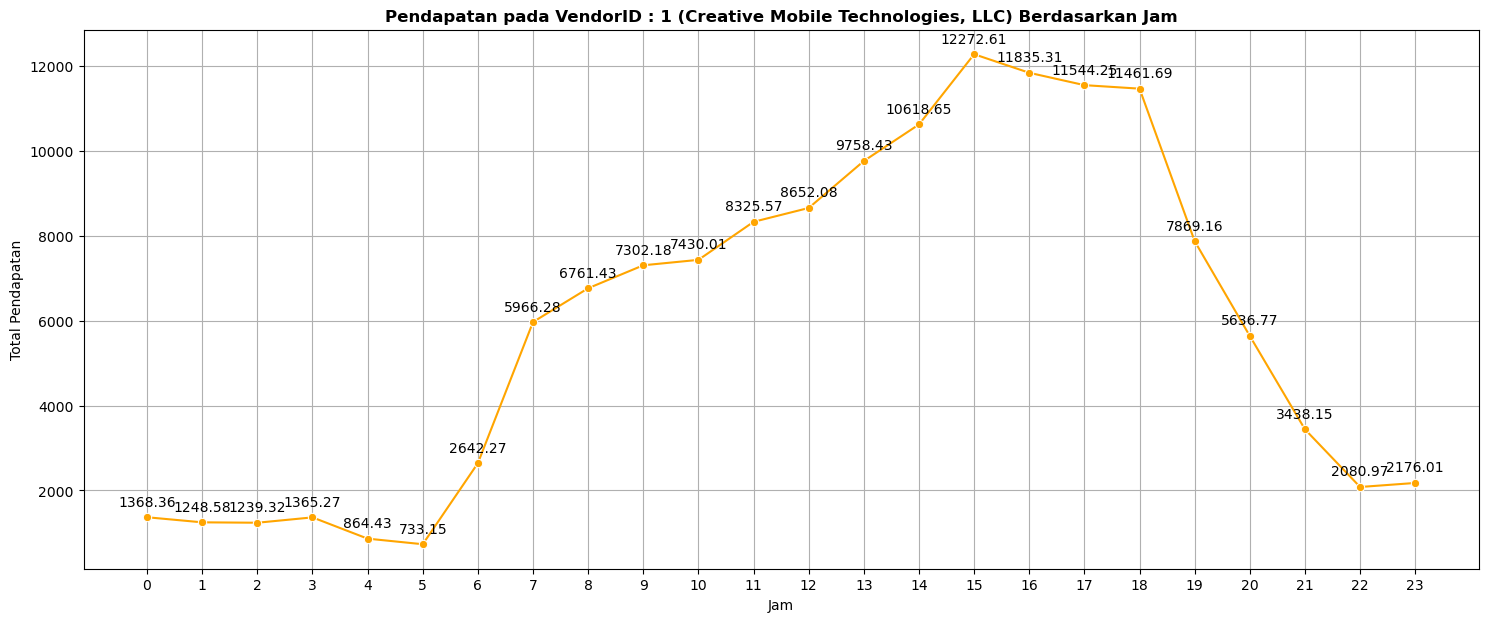

In [51]:
total_amount_VendorID_1_by_hour = df_VendorID_1[['total_amount', 'hour']].groupby('hour').sum().sort_values('total_amount', ascending=False).reset_index()


# Visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='total_amount', x='hour', data=total_amount_VendorID_1_by_hour, color='orange', marker='o')

ax.set_xticks(total_amount_VendorID_1_by_hour['hour'])
ax.set_xticklabels(total_amount_VendorID_1_by_hour['hour'])

for x, y in zip(total_amount_VendorID_1_by_hour['hour'], total_amount_VendorID_1_by_hour['total_amount']):
    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Pendapatan')
plt.title('Pendapatan pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Jam', fontweight='bold')
plt.grid()
plt.show()


Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total pendapatan yang di hasilkan oleh VendorID 1 berada dalam rentang 733.15 - 12272.61 USD berdasarkan jam di bulan Januari 2023
- Pukul 15.00 merupakan waktu dengan total pendapatan tertinggi yaitu sebesar 12272.61 USD
- Pukul 05.00 merupakan waktu dengan total pendapatan terendah yaitu sebesar 733.15 USD
- Terlihat juga pada rentang pukul 05.00 - 15.00 terdapat fluktuasi kenaikan total pendapatan secara signifikan, sedangkan fluktuasi pada rentang pukul 15.00 - 05.00 terlihat cenderung menurun, pada rentang pukul 22.00 - 05.00  terjadi peningkatan kecil antara pukul 22.00 - 23.00. Namun setelah itu, terjadi penurunan yang signifikan.

### Total Tip Berdasarkan Hari

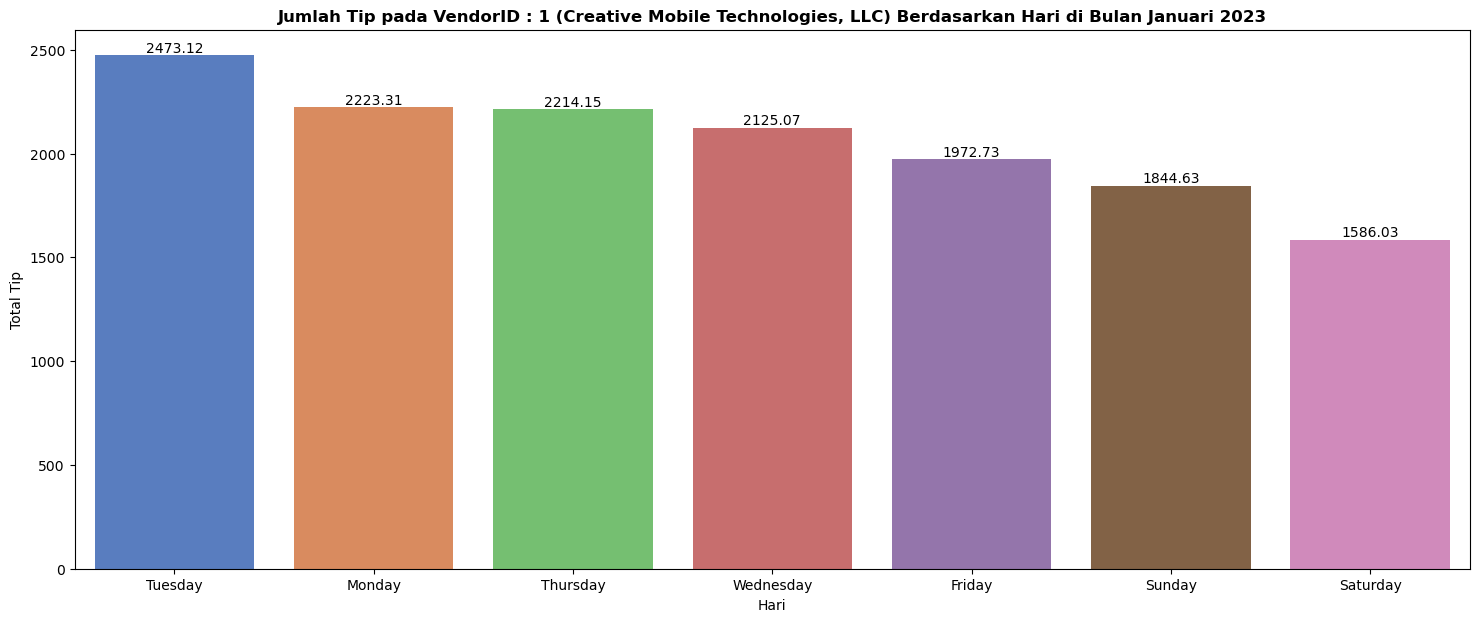

In [52]:
tip_amount_VendorID_1_by_day = df_VendorID_1[['tip_amount', 'day']].groupby('day').sum().sort_values('tip_amount', ascending = False).reset_index()


plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'tip_amount',x='day', data= tip_amount_VendorID_1_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Total Tip')
plt.xlabel('Hari')

plt.title('Jumlah Tip pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total tip yang di hasilkan oleh VendorID 1 berada dalam rentang 1586.03 - 2473.12 USD berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana totap tip tertinggi sebesar 22473.12 USD yang hasilkan oleh VendorID 1
- Hari Sabtu (Saturday) merupakan hari dimana pendapatan total tarif terendah sebesar 1586.03 USD yang hasilkan oleh VendorID 1

### Total Tip Berdasarkan Jam

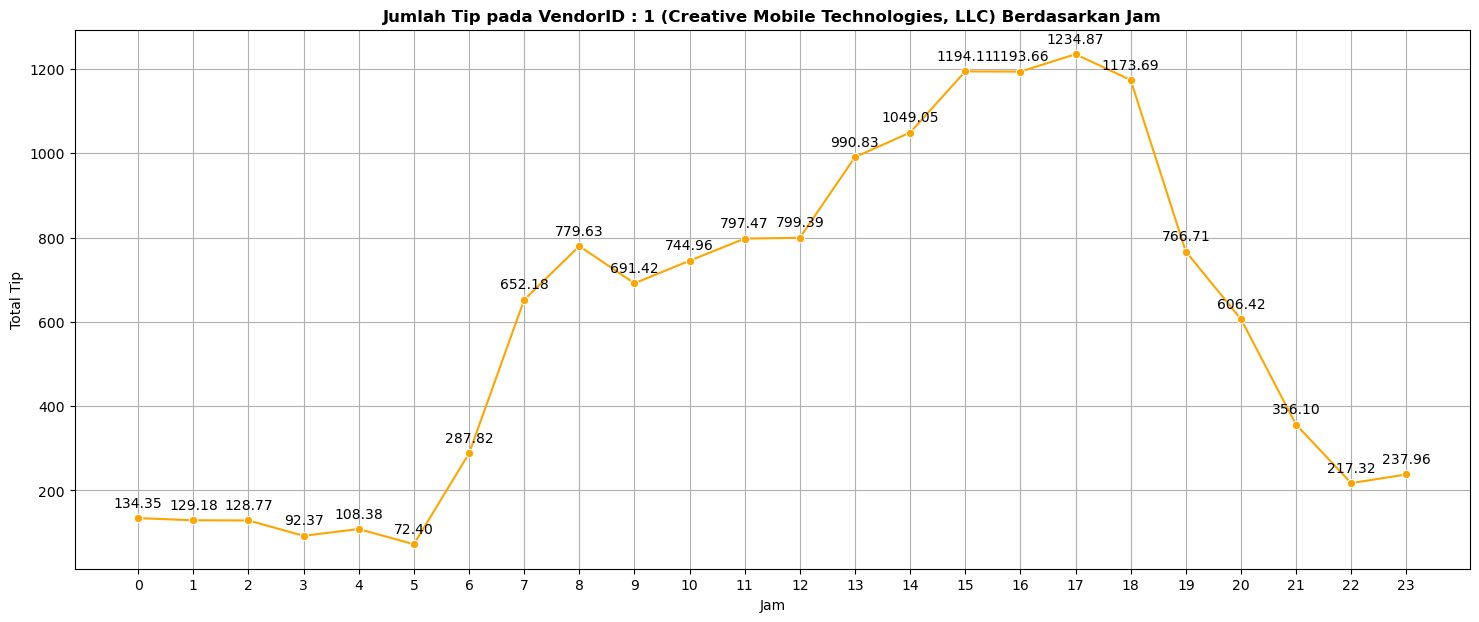

In [53]:
tip_amount_VendorID_1_by_hour = df_VendorID_1[['tip_amount', 'hour']].groupby('hour').sum().sort_values('tip_amount', ascending=False).reset_index()


# Visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='tip_amount', x='hour', data=tip_amount_VendorID_1_by_hour, color='orange', marker='o')

ax.set_xticks(tip_amount_VendorID_1_by_hour['hour'])
ax.set_xticklabels(tip_amount_VendorID_1_by_hour['hour'])

for x, y in zip(tip_amount_VendorID_1_by_hour['hour'], tip_amount_VendorID_1_by_hour['tip_amount']):
    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Tip')
plt.title('Jumlah Tip pada VendorID : 1 (Creative Mobile Technologies, LLC) Berdasarkan Jam', fontweight='bold')
plt.grid()
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total tip yang di hasilkan oleh VendorID 1 berada dalam rentang 72.40 - 1234.87 USD berdasarkan jam di bulan Januari 2023
- Pukul 17.00 merupakan waktu dengan total tip tertinggi yaitu sebesar 1234.87 USD
- Pukul 05.00 merupakan waktu dengan total tip terendah yaitu sebesar 72.40 USD
- Terlihat juga pada rentang pukul 05.00 - 17.00 terdapat fluktuasi kenaikan total tip secara signifikan, meski mengalami sedikit penurunan pada pukul 08.00 - 09.00. Sedangkan fluktuasi pada rentang pukul 17.00 - 05.00 terlihat cenderung menurun. Pada rentang pukul 22.00 - 04.00  terjadi peningkatan kecil antara pukul 22.00 - 23.00. Namun setelah itu, terjadi penurunan yang signifikan.

## 2. Vendor ID 2 (VeriFone Inc)

### Total jarak tempuh berdasarkan hari

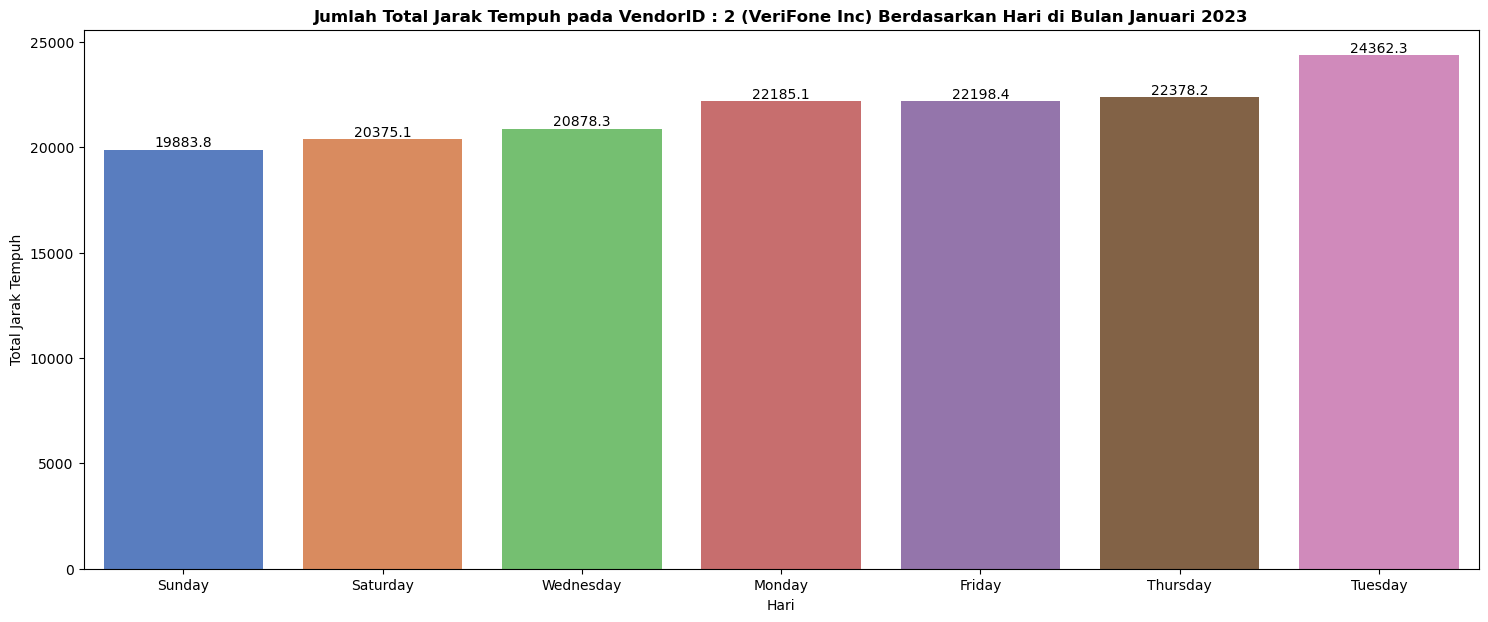

In [54]:
trip_distance_VendorID_2_by_day = df_VendorID_2[['trip_distance', 'day']].groupby('day').sum().sort_values('trip_distance').reset_index()
trip_distance_VendorID_2_by_day

plt.figure(figsize= (18, 7))

ax = sns.barplot(y= 'trip_distance',x='day', data= trip_distance_VendorID_2_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Total Jarak Tempuh')
plt.xlabel('Hari')

plt.title('Jumlah Total Jarak Tempuh pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total jarak tempuh yang di operasikan oleh VendorID 2 berada dalam rentang 19883.8 - 24362.3 mil berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana total jarak tempuh tertinggi sebesar 24362.3 mil yang dioperasikan oleh VendorID 2
- Hari Sabtu (Saturday) merupakan hari dimana total jarak tempuh terendah sebesar 19883.8 mil yang dioperasikan oleh VendorID 2

### Total Jarak Tempuh Berdasarkan Jam

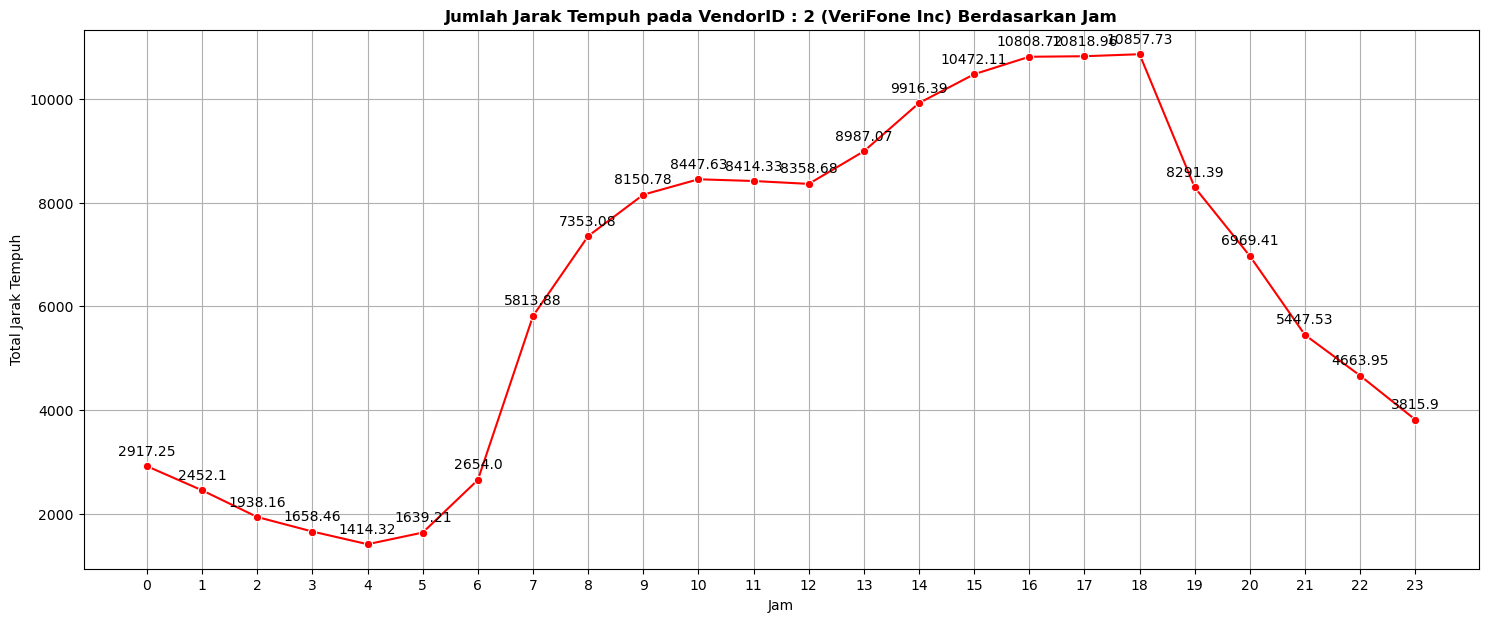

In [55]:
trip_distance_VendorID_2_by_hour = df_VendorID_2[['trip_distance', 'hour']].groupby('hour').sum().sort_values('trip_distance', ascending = False).reset_index()
trip_distance_VendorID_1_by_hour

#visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='trip_distance', x='hour', data=trip_distance_VendorID_2_by_hour, color='red', marker='o')


ax.set_xticks(trip_distance_VendorID_2_by_hour['hour'])
ax.set_xticklabels(trip_distance_VendorID_2_by_hour['hour'])

for x, y in zip(trip_distance_VendorID_2_by_hour['hour'], trip_distance_VendorID_2_by_hour['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Jarak Tempuh')
plt.title('Jumlah Jarak Tempuh pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam', fontweight = 'bold')
plt.grid()
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total jarak tempuh yang di operasikan oleh VendorID 2 berada dalam rentang 1414.32 - 10857.73 mil berdasarkan jam pada bulan Januari 2023
- Pukul 16.00 merupakan waktu dengan total jarak tempuh tertinggi yaitu sebesar 10857.73 mil
- Pukul 04.00 merupakan waktu dengan total jarak tempuh terendah yaitu sebesar 1414.32 mil
- Terlihat juga pada rentang pukul 04.00 - 16.00 terdapat fluktuasi kenaikan total jarak tempuh, meski pada pukul 09.00 - 12.00 terlihat cenderung stabil dan naik kembali pada rentang pukul 12.00 - 16.00, sedangkan fluktuasi pada rentang pukul 16.00 - 04.00 cenderung menurun secara signifikan

### Total Pendapatan Berdasarkan Hari

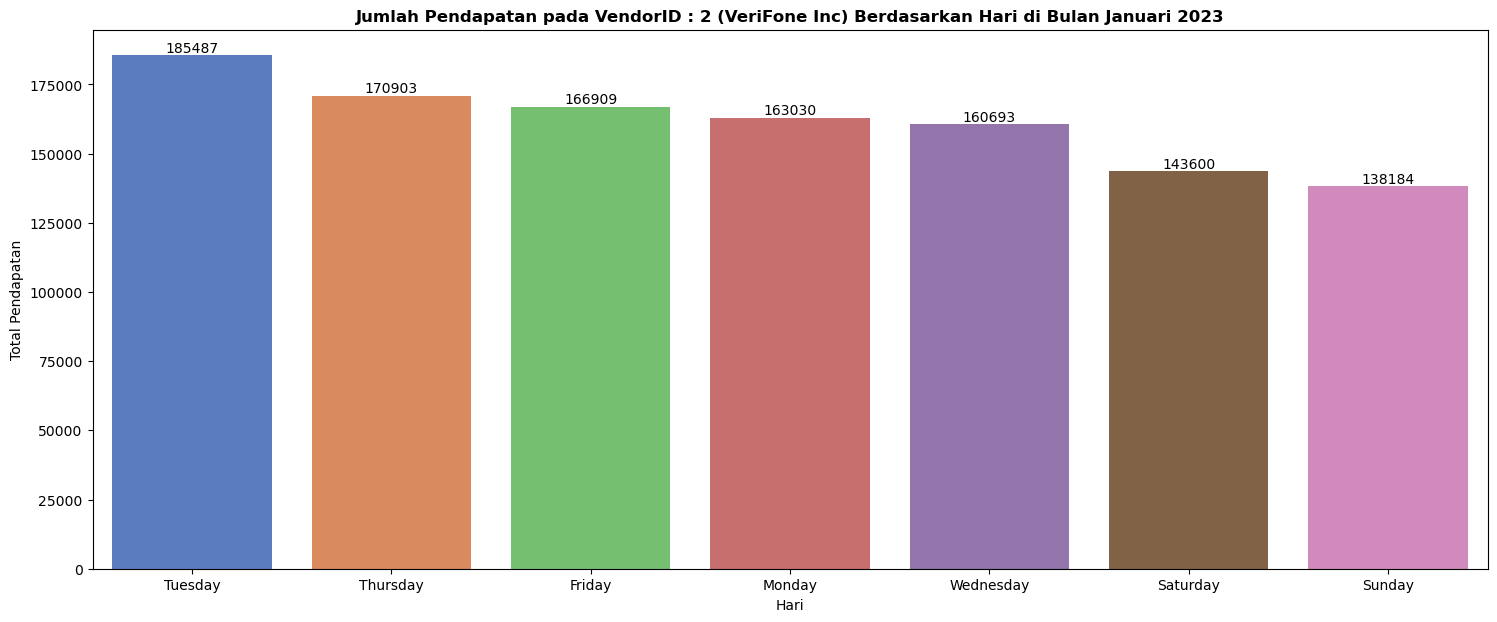

In [56]:
total_amount_VendorID_2_by_day = df_VendorID_2[['total_amount', 'day']].groupby('day').sum().sort_values('total_amount', ascending = False).reset_index()


plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'total_amount',x='day', data= total_amount_VendorID_2_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Total Pendapatan')
plt.xlabel('Hari')

plt.title('Jumlah Pendapatan pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total pendapatan yang di hasilkan oleh VendorID 2 berada dalam rentang 138184 - 185487 USD berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana pendapatan tertinggi sebesar 185487 USD yang hasilkan oleh VendorID 2
- Hari Minggu (Sunday) merupakan hari dimana pendapatan total tarif terendah sebesar 138184 USD yang hasilkan oleh VendorID 2

### Total Pendapatan Berdasarkan Jam

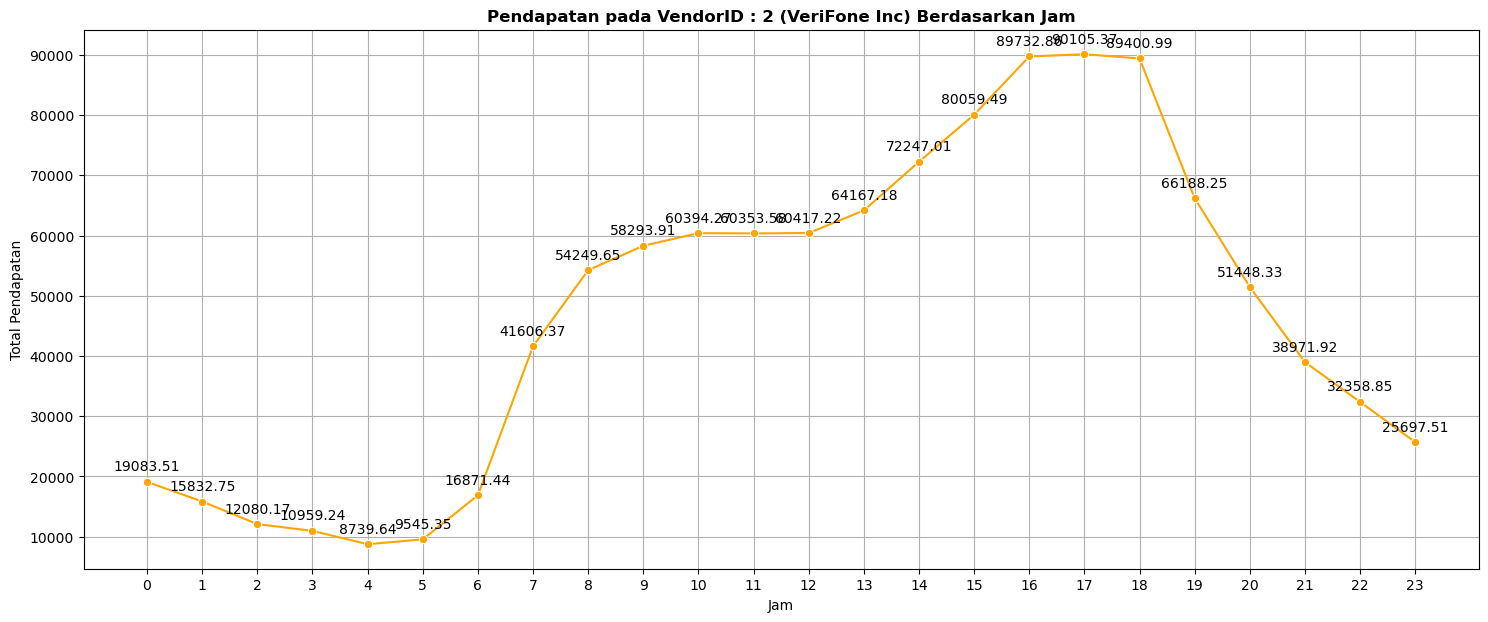

In [57]:
total_amount_VendorID_2_by_hour = df_VendorID_2[['total_amount', 'hour']].groupby('hour').sum().sort_values('total_amount', ascending=False).reset_index()


# Visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='total_amount', x='hour', data=total_amount_VendorID_2_by_hour, color='orange', marker='o')

ax.set_xticks(total_amount_VendorID_2_by_hour['hour'])
ax.set_xticklabels(total_amount_VendorID_2_by_hour['hour'])

for x, y in zip(total_amount_VendorID_2_by_hour['hour'], total_amount_VendorID_2_by_hour['total_amount']):
    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Pendapatan')
plt.title('Pendapatan pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam', fontweight='bold')
plt.grid()
plt.show()


Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total pendapatan yang di hasilkan oleh VendorID 2 berada dalam rentang 8739.64 - 90105.37 USD berdasarkan jam di bulan Januari 2023
- Pukul 17.00 merupakan waktu dengan total pendapatan tertinggi yaitu sebesar 90105.37 USD
- Pukul 04.00 merupakan waktu dengan total pendapatan terendah yaitu sebesar 8739.64 USD
- Terlihat juga pada rentang pukul 04.00 - 17.00 terdapat fluktuasi kenaikan total pendapatan secara signifikan, sedangkan fluktuasi pada rentang pukul 17.00 - 04.00 terlihat penurunan secara signifikan.

### Total Tip Berdasarkan Hari

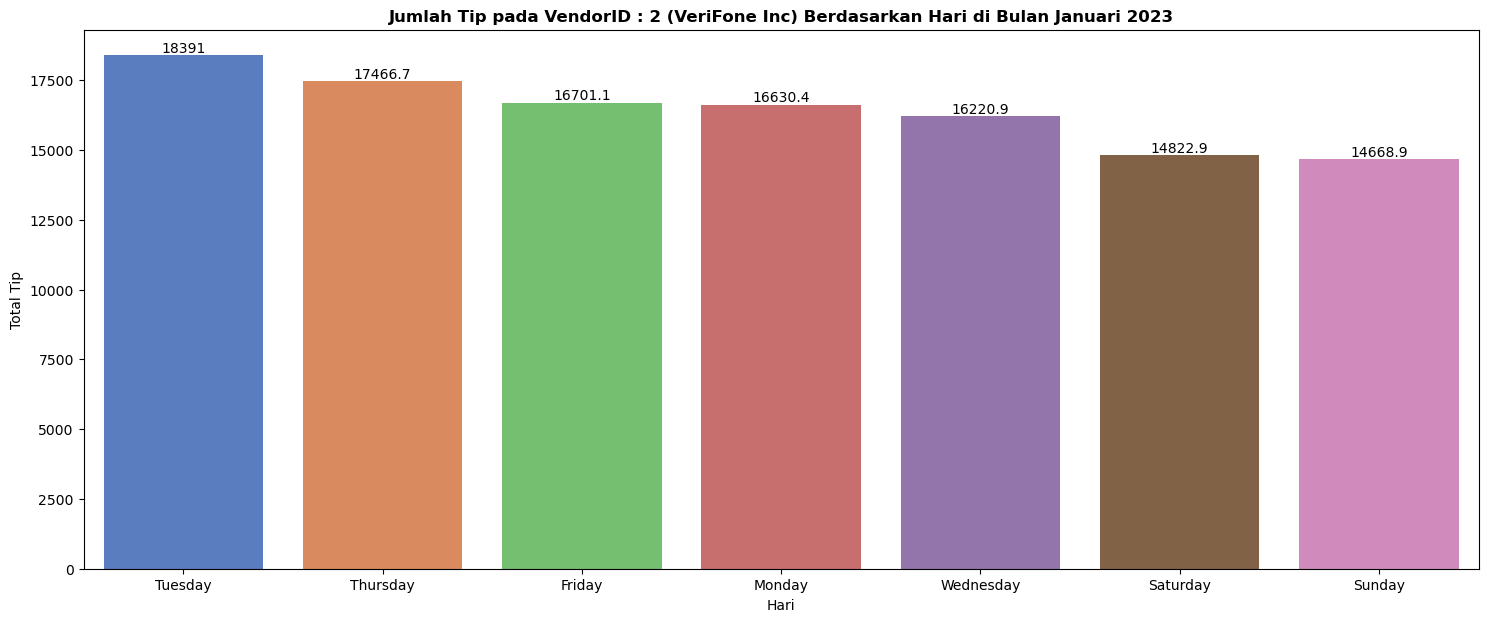

In [58]:
tip_amount_VendorID_2_by_day = df_VendorID_2[['tip_amount', 'day']].groupby('day').sum().sort_values('tip_amount', ascending = False).reset_index()


plt.figure(figsize= (18, 7))
ax = sns.barplot(y= 'tip_amount',x='day', data= tip_amount_VendorID_2_by_day, palette='muted')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Total Tip')
plt.xlabel('Hari')

plt.title('Jumlah Tip pada VendorID : 2 (VeriFone Inc) Berdasarkan Hari di Bulan Januari 2023', fontweight='bold')

plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total tip yang di hasilkan oleh VendorID 2 berada dalam rentang 14668.9 - 18391 USD berdasarkan hari pada bulan Januari 2023
- Hari Selasa (Tuesday) merupakan hari dimana totap tip tertinggi sebesar 18391 USD yang hasilkan oleh VendorID 2
- Hari Sabtu (Saturday) merupakan hari dimana pendapatan total tarif terendah sebesar 14668.9 USD yang hasilkan oleh VendorID 2

### Total Tip Berdasarkan Jam

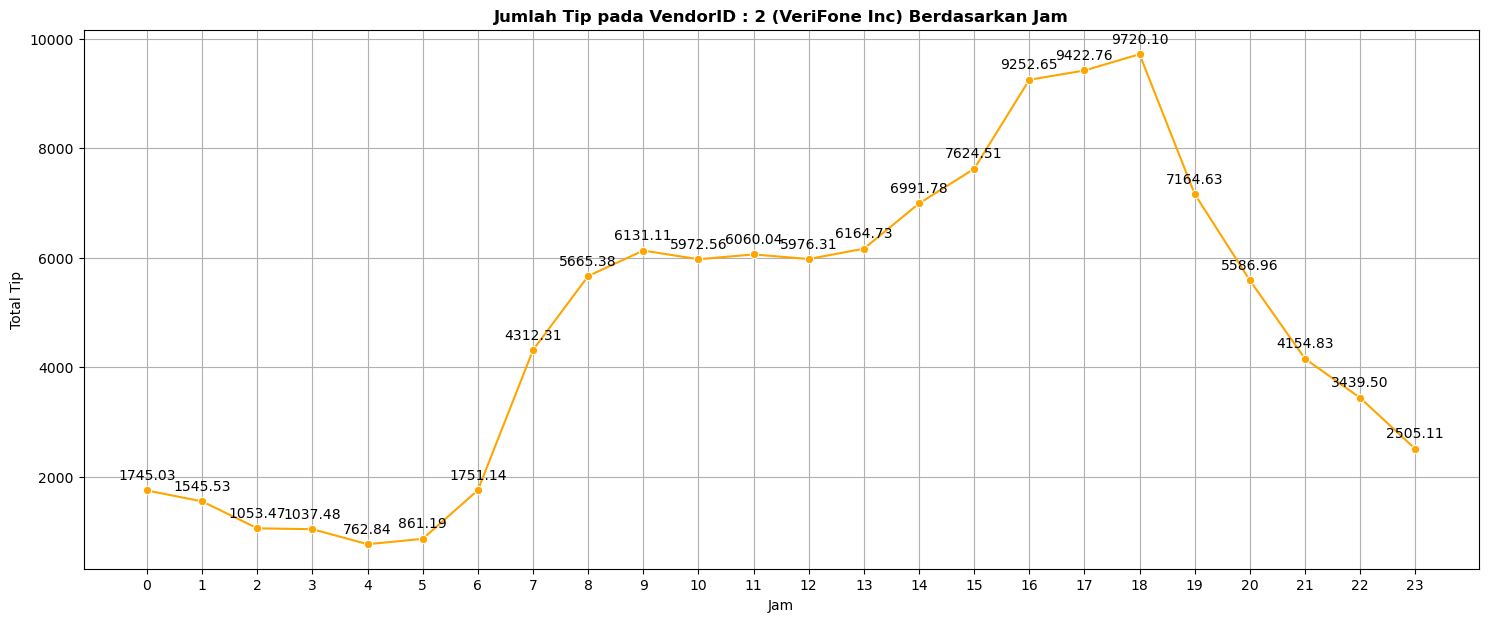

In [59]:
tip_amount_VendorID_2_by_hour = df_VendorID_2[['tip_amount', 'hour']].groupby('hour').sum().sort_values('tip_amount', ascending=False).reset_index()


# Visualisasi
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='tip_amount', x='hour', data=tip_amount_VendorID_2_by_hour, color='orange', marker='o')

ax.set_xticks(tip_amount_VendorID_2_by_hour['hour'])
ax.set_xticklabels(tip_amount_VendorID_2_by_hour['hour'])

for x, y in zip(tip_amount_VendorID_2_by_hour['hour'], tip_amount_VendorID_2_by_hour['tip_amount']):
    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 8), ha='center')

plt.xlabel('Jam')
plt.ylabel('Total Tip')
plt.title('Jumlah Tip pada VendorID : 2 (VeriFone Inc) Berdasarkan Jam', fontweight='bold')
plt.grid()
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa :
- Total tip yang di hasilkan oleh VendorID 2 berada dalam rentang 762.84 - 9720.10 USD berdasarkan jam di bulan Januari 2023
- Pukul 18.00 merupakan waktu dengan total tip tertinggi yaitu sebesar 9720.10 USD
- Pukul 04.00 merupakan waktu dengan total tip terendah yaitu sebesar 762.84 USD
- Terlihat juga pada rentang pukul 04.00 - 18.00 terdapat fluktuasi kenaikan total tip secara signifikan, Sedangkan fluktuasi pada rentang pukul 18.00 - 04.00 terjadi penurunan secara signifikan.

## Perbandingan Jumlah Jarak Tempuh (trip_distance) antara VendorID 1 dengan VendorID 2 Berdasarkan Hari

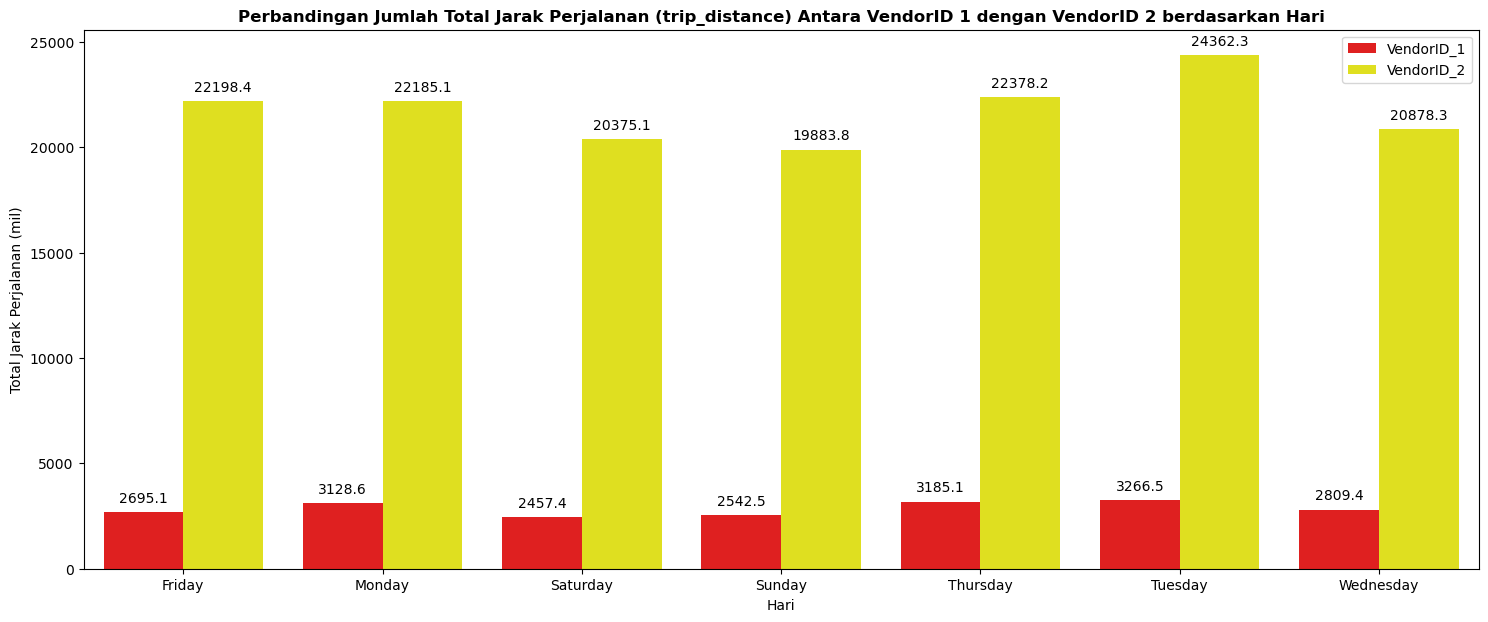

In [60]:
trip_distance_VendorID_1 = df_VendorID_1.groupby('day')['trip_distance'].sum().reset_index()
trip_distance_VendorID_1.rename(columns={'trip_distance': 'VendorID_1'}, inplace=True)

trip_distance_VendorID_2 = df_VendorID_2.groupby('day')['trip_distance'].sum().reset_index()
trip_distance_VendorID_2.rename(columns={'trip_distance': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(trip_distance_VendorID_1, trip_distance_VendorID_2, on='day')

my_palette = sns.color_palette(['red', 'yellow'])

plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Perbandingan Jumlah Total Jarak Perjalanan (trip_distance) Antara VendorID 1 dengan VendorID 2 berdasarkan Hari', fontweight='bold')

plt.xlabel('Hari')
plt.ylabel('Total Jarak Perjalanan (mil)')
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, dapat dilihat bahwa :
* Barplot diatas adalah perbandingan total jumlah jarak perjalanan antara VendorID 1 dan Vendor ID 2 berdasarkan hari pada bulan Januari 2023. VendorID 1 dengan bar berwarna merah, dan VendorID 2 berwarna kuning.
* VendorID 2 memiliki total jumlah jarak perjalanan tertinggi dibanding VendorID 1
* Hari dengan total jumlah perjalanan tertinggi pada VendorID 1 dan Vendor ID 2 adalah sama, yaitu pada hari Selasa (Tuesday).
* Hari dengan total jumlah perjalanan terendah pada VendorID 1 di hari Sabtu (Saturday ) dan VendorID 2 adalah yaitu pada hari Minggu (Sunday)

## Perbandingan Jumlah Jarak Tempuh (trip_distance) antara VendorID 1 dengan VendorID 2 Berdasarkan Jam

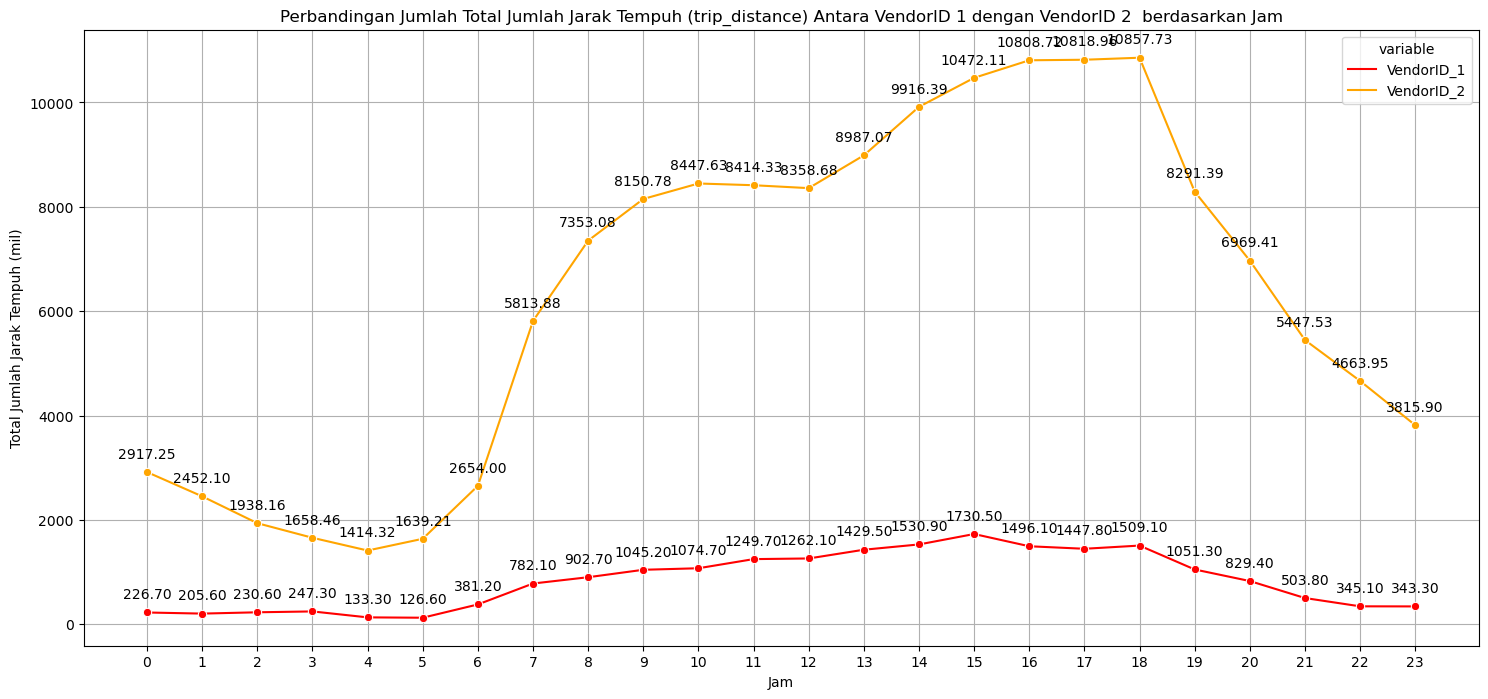

In [61]:
trip_distance_VendorID_1 = df_VendorID_1.groupby('hour')['trip_distance'].sum().reset_index()
trip_distance_VendorID_1.rename(columns={'trip_distance': 'VendorID_1'}, inplace=True)

trip_distance_VendorID_2 = df_VendorID_2.groupby('hour')['trip_distance'].sum().reset_index()
trip_distance_VendorID_2.rename(columns={'trip_distance': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(trip_distance_VendorID_1, trip_distance_VendorID_2, on='hour')

plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='hour', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'red', 'VendorID_2': 'orange'}, marker='o')

for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')
plt.title('Perbandingan Jumlah Total Jumlah Jarak Tempuh (trip_distance) Antara VendorID 1 dengan VendorID 2  berdasarkan Jam')

ax.set_xticks(comparison_df['hour'])
ax.set_xticklabels(comparison_df['hour'])

plt.xlabel('Jam')
plt.ylabel('Total Jumlah Jarak Tempuh (mil)')
plt.grid()
plt.show()

Berdasarkan Visualisasi diatas, dapat dilihat bahwa

* Lineplot tersebut merupakan perbandingan antara total jumlah jarak tempuh antara VendorID 1 dan Vendor ID 2 berdasarkan jam pada bukan Januari 2023. VendorID 1 ditandai dengan lineplot berwarna merah, sedangkan VendorID 2 ditandai dengan lineplot berwarna kuning.
* VendorID 2 memiliki total jumlah jarak perjalanan yang paling tinggi dibanding VendorID 2
* Pada VendorID 2, jumlah jarak perjalanan tertinggi berada pada pukul 18.00 yaitu sebesar 10857.73 mil, sedangkan yang terendahnya berada pada pukul 04.00 sebesar 1414.32 mil
* Pada VendorID 1, jumlah jarak perjalanan tertinggi berada pada pukul 15.00 yaitu sebesar 1730.50 mil, sedangkan yang terendahnya berada pada pukul 05.00 sebesar 126.60 mil

## Perbandingan Jumlah Total Pendapatan (total_amount) antara VendorID 1 dengan VendorID 2 Berdasarkan Hari

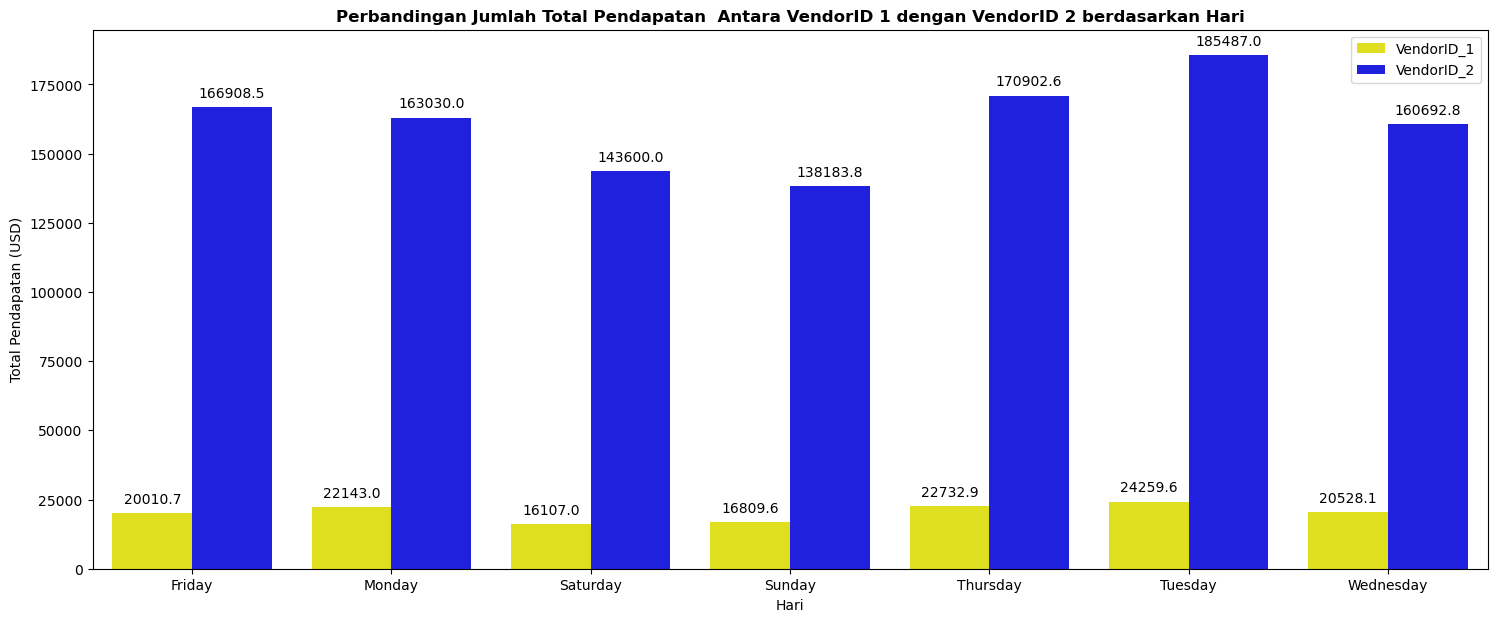

In [62]:
total_amount_VendorID_1 = df_VendorID_1.groupby('day')['total_amount'].sum().reset_index()
total_amount_VendorID_1.rename(columns={'total_amount': 'VendorID_1'}, inplace=True)

total_amount_VendorID_2 = df_VendorID_2.groupby('day')['total_amount'].sum().reset_index()
total_amount_VendorID_2.rename(columns={'total_amount': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(total_amount_VendorID_1, total_amount_VendorID_2, on='day')

my_palette = sns.color_palette(['yellow', 'blue'])

plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Perbandingan Jumlah Total Pendapatan  Antara VendorID 1 dengan VendorID 2 berdasarkan Hari', fontweight='bold')

plt.xlabel('Hari')
plt.ylabel('Total Pendapatan (USD)')
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, dapat dilihat bahwa :
* Barplot diatas adalah perbandingan total jumlah pendapatan antara VendorID 1 dan Vendor ID 2 berdasarkan hari pada bulan Januari 2023. VendorID 1 dengan bar berwarna biru, dan VendorID 2 berwarna kuning.
* VendorID 2 memiliki total jumlah pendapatan tertinggi dibanding VendorID 1
* Hari dengan total jumlah pendapatan tertinggi pada VendorID 1 dan Vendor ID 2 adalah sama, yaitu pada hari Selasa (Tuesday).
* Hari dengan total jumlah perjalanan terendah pada VendorID 1 adalah pada hari Sabtu (Saturday), sedangkan pada VendorID 2 adalah pada hari Minggu (Sunday)

## Perbandingan Jumlah Total Pendapatan (total_amount) antara VendorID 1 dengan VendorID 2 Berdasarkan Jam

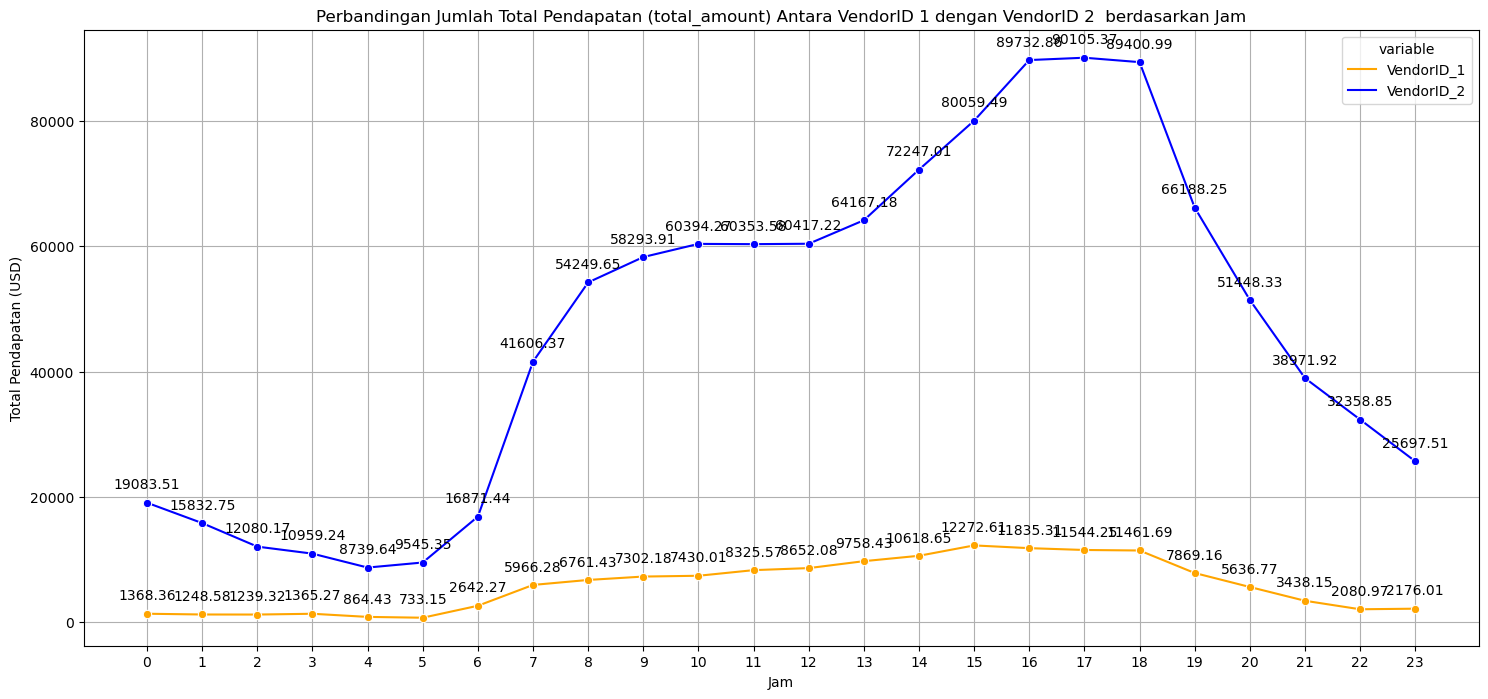

In [63]:
total_amount_VendorID_1 = df_VendorID_1.groupby('hour')['total_amount'].sum().reset_index()
total_amount_VendorID_1.rename(columns={'total_amount': 'VendorID_1'}, inplace=True)

total_amount_VendorID_2 = df_VendorID_2.groupby('hour')['total_amount'].sum().reset_index()
total_amount_VendorID_2.rename(columns={'total_amount': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(total_amount_VendorID_1, total_amount_VendorID_2, on='hour')

plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='hour', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'orange', 'VendorID_2': 'blue'}, marker='o')

for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')
plt.title('Perbandingan Jumlah Total Pendapatan (total_amount) Antara VendorID 1 dengan VendorID 2  berdasarkan Jam')

ax.set_xticks(comparison_df['hour'])
ax.set_xticklabels(comparison_df['hour'])

plt.xlabel('Jam')
plt.ylabel('Total Pendapatan (USD)')
plt.grid()
plt.show()

Berdasarkan Visualisasi diatas, dapat dilihat bahwa

* Lineplot tersebut merupakan perbandingan antara total jumlah pendapatan antara VendorID 1 dan Vendor ID 2 berdasarkan jam pada bukan Januari 2023. VendorID 1 ditandai dengan lineplot berwarna kuning, sedangkan VendorID 2 ditandai dengan lineplot berwarna biru.
* VendorID 2 memiliki total jumlah pendapatan yang paling tinggi dibanding VendorID 2
* Pada VendorID 2, jumlah pendapatan tertinggi berada pada pukul 17.00 yaitu sebesar 90105.37 USD, sedangkan yang terendahnya berada pada pukul 04.00 sebesar 8739.64 USD
* Pada VendorID 1, jumlah jarak perjalanan tertinggi berada pada pukul 15.00 yaitu sebesar 12272.61 USD, sedangkan yang terendahnya berada pada pukul 05.00 sebesar 733.15 USD

## Perbandingan Jumlah Total Tip (tip_amount) antara VendorID 1 dengan VendorID 2 Berdasarkan Hari

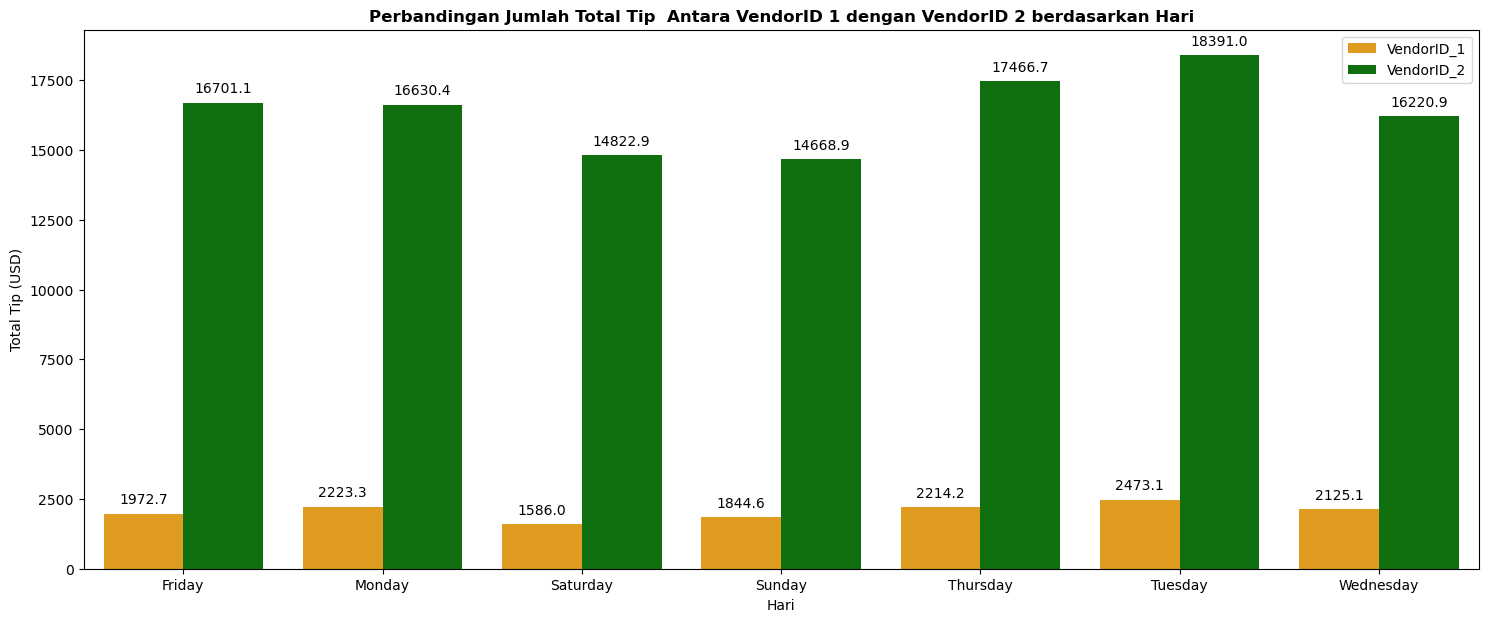

In [64]:
tip_amount_VendorID_1 = df_VendorID_1.groupby('day')['tip_amount'].sum().reset_index()
tip_amount_VendorID_1.rename(columns={'tip_amount': 'VendorID_1'}, inplace=True)

tip_amount_VendorID_2 = df_VendorID_2.groupby('day')['tip_amount'].sum().reset_index()
tip_amount_VendorID_2.rename(columns={'tip_amount': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(tip_amount_VendorID_1, tip_amount_VendorID_2, on='day')

my_palette = sns.color_palette(['orange', 'green'])

plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Perbandingan Jumlah Total Tip  Antara VendorID 1 dengan VendorID 2 berdasarkan Hari', fontweight='bold')

plt.xlabel('Hari')
plt.ylabel('Total Tip (USD)')
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, dapat dilihat bahwa :
* Barplot diatas adalah perbandingan total tip antara VendorID 1 dan Vendor ID 2 berdasarkan hari pada bulan Januari 2023. VendorID 1 dengan bar berwarna orange, dan VendorID 2 berwarna hijau.
* VendorID 2 memiliki total tip tertinggi dibanding VendorID 1
* Hari dengan total tip tertinggi pada VendorID 1 dan Vendor ID 2 adalah sama, yaitu pada hari Selasa (Tuesday).
* Hari dengan total tip terendah pada VendorID 1 adalah hari Sabtu (Saturday) dan Vendor ID 2 adalah  hari Minggu (Sunday)

## Perbandingan Jumlah Total Tip (tip_amount) antara VendorID 1 dengan VendorID 2 Berdasarkan Jam

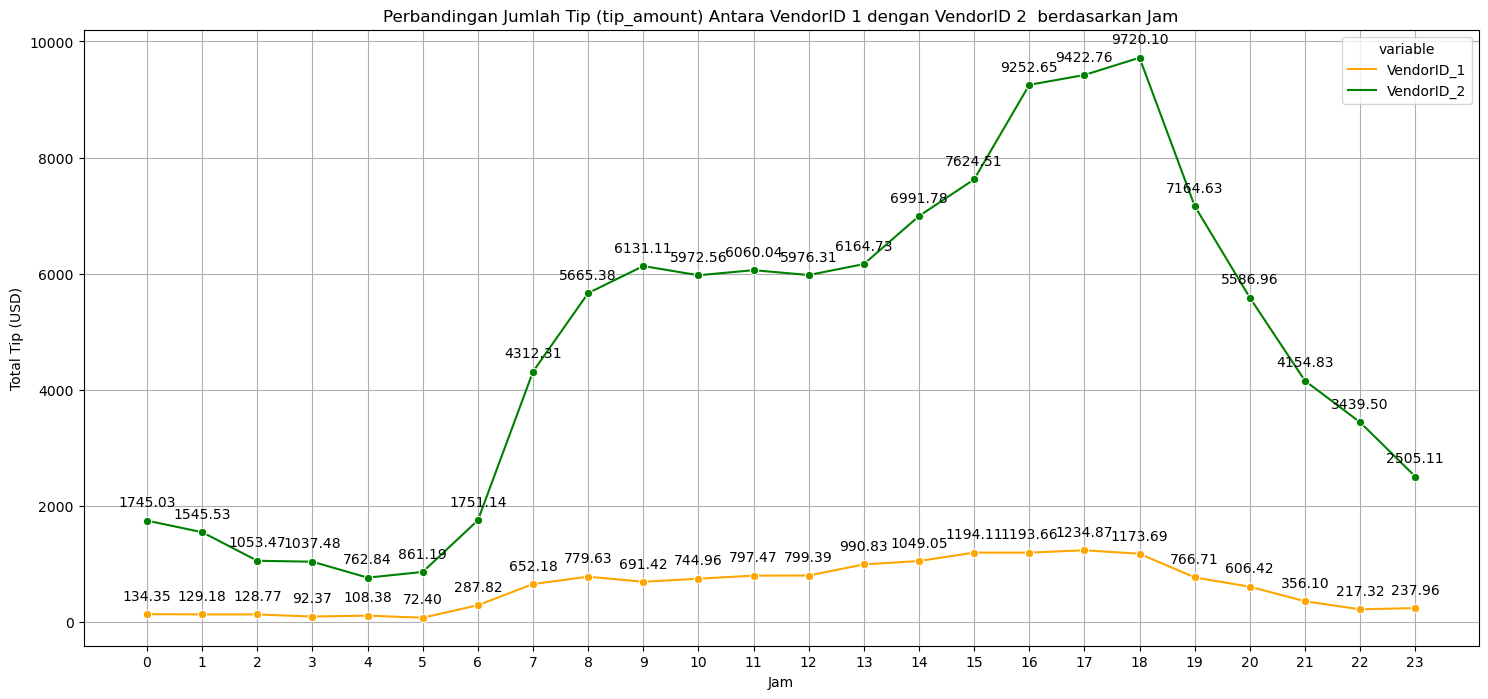

In [65]:
tip_amount_VendorID_1 = df_VendorID_1.groupby('hour')['tip_amount'].sum().reset_index()
tip_amount_VendorID_1.rename(columns={'tip_amount': 'VendorID_1'}, inplace=True)

tip_amount_VendorID_2 = df_VendorID_2.groupby('hour')['tip_amount'].sum().reset_index()
tip_amount_VendorID_2.rename(columns={'tip_amount': 'VendorID_2'}, inplace=True)

comparison_df = pd.merge(tip_amount_VendorID_1, tip_amount_VendorID_2, on='hour')

plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='hour', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'orange', 'VendorID_2': 'green'}, marker='o')

for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')
plt.title('Perbandingan Jumlah Tip (tip_amount) Antara VendorID 1 dengan VendorID 2  berdasarkan Jam')

ax.set_xticks(comparison_df['hour'])
ax.set_xticklabels(comparison_df['hour'])

plt.xlabel('Jam')
plt.ylabel('Total Tip (USD)')
plt.grid()
plt.show()

Berdasarkan Visualisasi diatas, dapat dilihat bahwa

* Lineplot tersebut merupakan perbandingan antara jumlah total tip antara VendorID 1 dan Vendor ID 2 berdasarkan jam pada bukan Januari 2023. VendorID 1 ditandai dengan lineplot berwarna orange, sedangkan VendorID 2 ditandai dengan lineplot berwarna hijau.
* VendorID 2 memiliki total tip yang paling tinggi dibanding VendorID 2
* Pada VendorID 1, jumlah total tip tertinggi berada pada pukul 17.00 yaitu sebesar 1234.87 USD, sedangkan yang terendahnya berada pada pukul 05.00 sebesar 72.40 USD
* Pada VendorID 2, jumlah jarak perjalanan tertinggi berada pada pukul 18.00 yaitu sebesar 9720.10 USD, sedangkan yang terendahnya berada pada pukul 04.00 sebesar 762.84 USD

### 2. Bagaimana pola perjalanan taxi mencerminkan tren permintaan penumpang di Bulan Januari 2023?

### Pola Perjalanan Taxi Berdasarkan Jumlah Penumpang

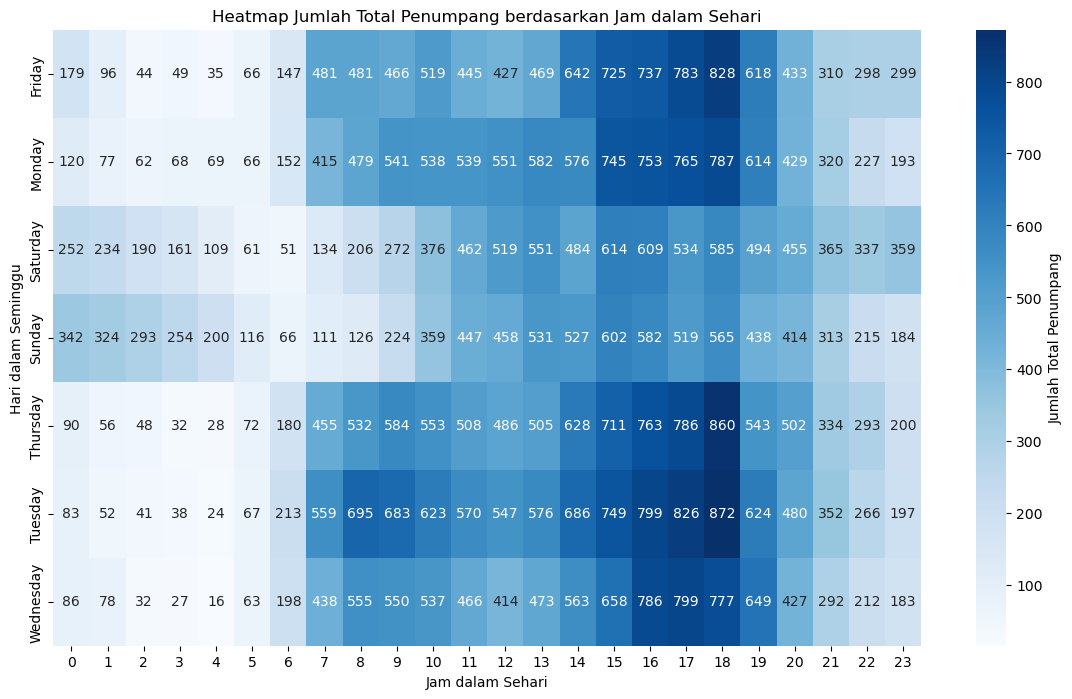

In [66]:
# Membuat heatmap distribusi jumlah penumpang berdasarkan jam dalam sehari
passenger_counts = df.groupby(['day', 'hour'])['passenger_count'].sum().reset_index(name='total_passenger_count')

# Menggunakan pivot_table untuk menghindari TypeError
heatmap_data_passenger = passenger_counts.pivot_table(index='day', columns='hour', values='total_passenger_count', aggfunc='sum')

# Visualisasi heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_passenger, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Jumlah Total Penumpang'})
plt.title('Heatmap Jumlah Total Penumpang berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Seminggu')
plt.show()


### Analisis:

1. **Gambaran Umum**
    - Visualisasi ini menggambarkan pola distribusi jumlah total penumpang taksi berdasarkan jam dalam sehari dan hari dalam seminggu.
    - Warna yang lebih gelap menunjukkan jumlah penumpang yang lebih tinggi pada waktu tertentu.

2. **Puncak Aktivitas, dan Jam Sibuk:**
   - Puncak warna gelap pada heatmap menunjukkan jam-jam di mana jumlah penumpang taksi mencapai tingkat tertinggi. Lokasi puncak ini dapat menjadi fokus perhatian untuk manajemen armada dan alokasi sumber daya. Berdasarkan informasi diatas dapat dilihat bahwa pada rentang pukul (07.00 - 20.00) jumlah penumpang cenderung terlihat lebih aktif, dan puncaknya adalah pada rentang pukul (15.00-18.00)

3. **Pola Berdasarkan Hari dalam Seminggu:**
   - Perbedaan pola distribusi jumlah penumpang pada hari dalam seminggu, dapat memberikan wawasan tentang perilaku penumpang. Berdasarkan data diatas, jumlah pada akhir pekan (Sabtu dan Minggu) terlihat lebih lengah dibanding pada hari lainnya.

4. **Perubahan Jumlah Penumpang Berdasarkan Hari:**
   - Perubahan signifikan terlihat pada pukul (07.00 - 09.00) pada akhir pekan (Sabtu dan Minggu) dibanding pada  hari kerja.
   - Pada weekdays (diluar sabtu minggu) terdapat perubahan signifikan pada pukul (21.00 - 06.00). Pada rentang waktu tersebut, jumlah penumpang terlihat lebih sedikit dibanding waktu lainnya.
   - Pada hari sabtu menjelang minggu antara pukul (21.00 di hari sabtu - 05.00 di hari minggu) terlihat jumlah penumpang lebih banyak/aktif dibanding hari lainnya.

### Tren permintaan penumpang berdasarkan jumlah penumpang per jam

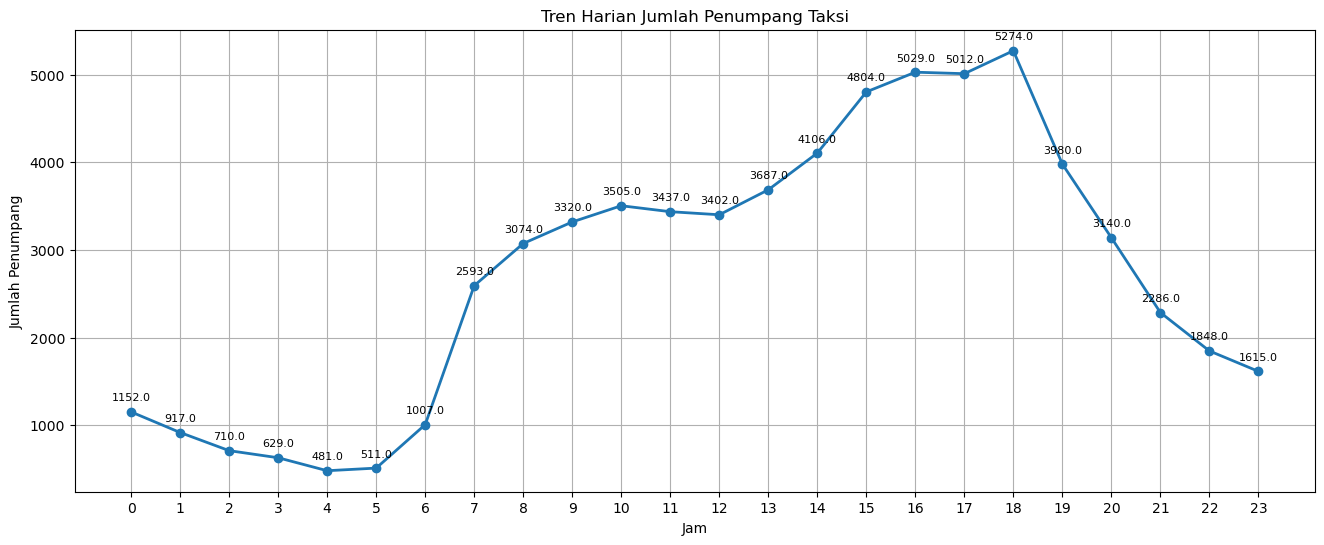

In [67]:
# Menghitung jumlah penumpang per jam
passenger_counts_hourly = df.groupby('hour')['passenger_count'].sum()

# Visualisasi tren harian
plt.figure(figsize=(16, 6))
passenger_counts_hourly.plot(linewidth=2, marker='o')
plt.title('Tren Harian Jumlah Penumpang Taksi')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(len(passenger_counts_hourly.index)), passenger_counts_hourly.index)  
plt.grid(True)

for i, count in enumerate(passenger_counts_hourly):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)
plt.show()



#### **Analisis:**

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa:

1. **Puncak Permintaan Penumpang:**
    - Tren harian menunjukkan bahwa puncak permintaan penumpang tertinggi terjadi pada pukul 17.00-18.00 dengan jumlah penumpang mencapai 5274 penumpang.

2. **Tren Menurun dan Peningkatan Signifikan:**
    - Permintaan penumpang cenderung menurun pada dini hari (pukul 24.00 - 04.00), namun kemudian mengalami peningkatan yang signifikan mulai dari pagi hingga mencapai puncaknya pada sore hari.

3. **Waktu Sibuk Potensial:**
    - Jam-jam tertentu, seperti pukul 07.00 - 08.00, 08.00 - 09.00, 15.00 - 16.00, dan puncak tertinggi pada jam 17.00 - 18.00, menunjukkan peningkatan signifikan dalam jumlah penumpang. Hal ini mengindikasikan potensi waktu-waktu sibuk yang dapat dimanfaatkan oleh pengemudi taksi dan layanan transportasi.

4. **Pentingnya Perencanaan pada Jam Puncak:**
    - Pengemudi taksi dan penyedia layanan transportasi perlu memperhatikan jam-jam puncak, terutama pada pukul 17.00 dan 18.00. Adanya lonjakan permintaan pada periode ini menandakan pentingnya perencanaan operasional dan penugasan armada untuk memenuhi kebutuhan tinggi penumpang.

5. **Pentingnya Strategi pada Jam Malam:**
    - Meskipun permintaan cenderung menurun pada pukul 24.00 - 05.00, strategi operasional dan promosi pada jam ini dapat membantu meningkatkan penggunaan layanan pada periode tersebut.

### Tren permintaan penumpang berdasarkan jumlah penumpang per jam di hari kerja dan akhir pekan

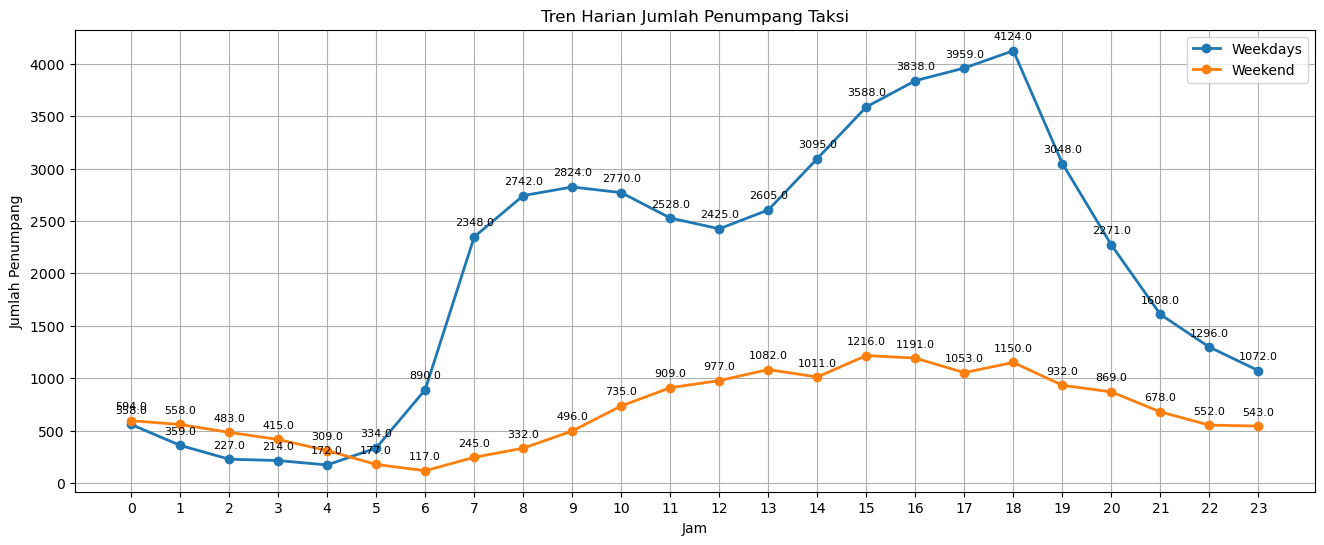

In [68]:
# Filter hanya pada hari kerja
weekdays_df = df[df['weekend'] == 0]

# Menghitung jumlah penumpang per jam pada hari kerja
passenger_counts_hourly_weekdays = weekdays_df.groupby('hour')['passenger_count'].sum()

# Filter hanya pada akhir pekan
weekend_df = df[df['weekend'] == 1]

# Menghitung jumlah penumpang per jam pada akhir pekan
passenger_counts_hourly_weekend = weekend_df.groupby('hour')['passenger_count'].sum()

# Visualisasi tren harian untuk hari kerja
plt.figure(figsize=(16, 6))
passenger_counts_hourly_weekdays.plot(linewidth=2, marker='o', label='Weekdays')
passenger_counts_hourly_weekend.plot(linewidth=2, marker='o', label='Weekend')
plt.title('Tren Harian Jumlah Penumpang Taksi')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(len(passenger_counts_hourly_weekdays.index)), passenger_counts_hourly_weekdays.index)  
plt.legend()
plt.grid(True)

for i, count in enumerate(passenger_counts_hourly_weekdays):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8)

for i, count in enumerate(passenger_counts_hourly_weekend):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8)

plt.show()


#### **Analisis:**

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa:

**Weekdays:**
1. Puncak permintaan penumpang terjadi pada jam 17.00-18.00 dengan jumlah tertinggi sepanjang hari, mencapai 4124 penumpang.
2. Jam-jam puncak lainnya termasuk jam 08.00-09.00, 09.00-10.00, dan 16.00-17.00 dengan jumlah penumpang melebihi 3000 pada masing-masing periode.
3. Permintaan penumpang pada pagi hari (jam 06.00-09.00) relatif tinggi, menunjukkan potensi waktu sibuk awal hari.

**Weekend:**
1. Puncak permintaan penumpang pada akhir pekan terjadi pada jam 15.00-16.00 dengan jumlah penumpang mencapai 1216 penumpang
2. Jam-jam sibuk lainnya pada weekend termasuk jam 10.00-11.00, 11.00-12.00, dan 14.00-15.00 dengan jumlah penumpang melebihi 900 pada masing-masing periode.
3. Perbedaan pola dengan weekdays, terdapat peningkatan signifikan pada pagi hari pada weekend (jam 06.00-09.00).

Kesimpulannya, strategi operasional dan penugasan armada dapat diarahkan pada jam-jam puncak ini untuk memaksimalkan pelayanan selama weekdays dan weekend. Pemahaman ini dapat membantu penyedia layanan transportasi agar mengoptimalkan efisiensi dan memenuhi kebutuhan penumpang pada waktu-waktu kritis.

### Tren Permintaan Penumpang Berdasarkan Jumlah Penumpang Per Hari

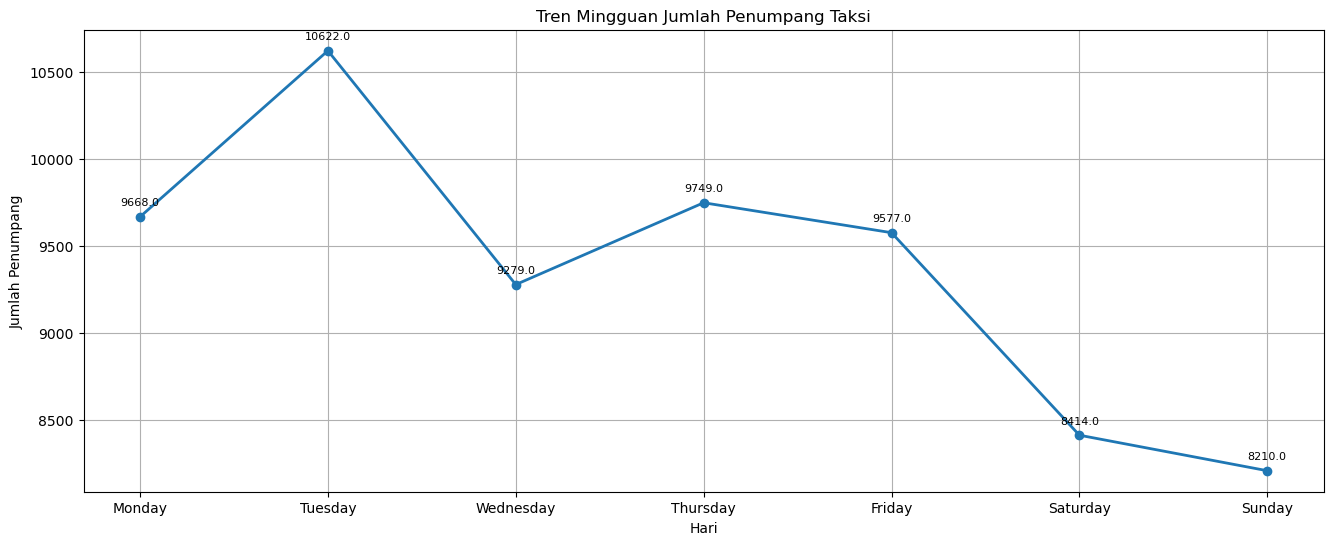

In [69]:
# Menghitung jumlah penumpang per hari
passenger_counts_daily = df.groupby('day')['passenger_count'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengubah tipe data 'day' menjadi kategori dengan urutan yang ditentukan
passenger_counts_daily.index = pd.Categorical(passenger_counts_daily.index, categories=days_order, ordered=True)

# Mengurutkan berdasarkan urutan kategori
passenger_counts_daily = passenger_counts_daily.sort_index()

# Visualisasi tren mingguan
plt.figure(figsize=(16, 6))
passenger_counts_daily.plot(linewidth=2, marker='o')  # Menambahkan marker pada setiap poin
plt.title('Tren Mingguan Jumlah Penumpang Taksi')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')
plt.grid(True)
plt.xticks(range(len(passenger_counts_daily.index)), passenger_counts_daily.index)  # Menambahkan label waktu

# Menambahkan anotasi
for i, count in enumerate(passenger_counts_daily):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)

plt.show()



#### **Analisis :**

Berdasarkan visualisasi di atas dapat disimpulkan bahwa :

1. **Tren Harian:**
    - Jumlah penumpang tertinggi terjadi pada hari Selasa dengan 10622 penumpang.
    - Pada hari Sabtu dan Minggu, jumlah penumpang cenderung lebih rendah dibandingkan dengan hari-hari kerja.

2. **Perbedaan Antara Hari Kerja dan Akhir Pekan:**
    - Jumlah penumpang pada hari Senin hingga Jumat (hari kerja) cenderung lebih tinggi dibandingkan dengan Sabtu dan Minggu (akhir pekan).

3. **Tren Mingguan:**
    - Grafik menunjukkan tren mingguan yang konsisten, dengan fluktuasi tertentu di sepanjang minggu.
    - Ada peningkatan di awal minggu (Senin ke Selasa), kemudian cenderung menurun menjelang akhir pekan (Jumat hingga Minggu). 

### 3. Apakah terdapat hubungan yang signifikan antara jumlah bayar (total_amount) dan jumlah tip (tip_amount) yang diberikan oleh penumpang kepada pengemudi taksi?

Korelasi antara Total Amount dan Tip Amount: 0.56
P-value: 0.00
Regresi Linier: Tip Amount = 0.12 * Total Amount + -0.36


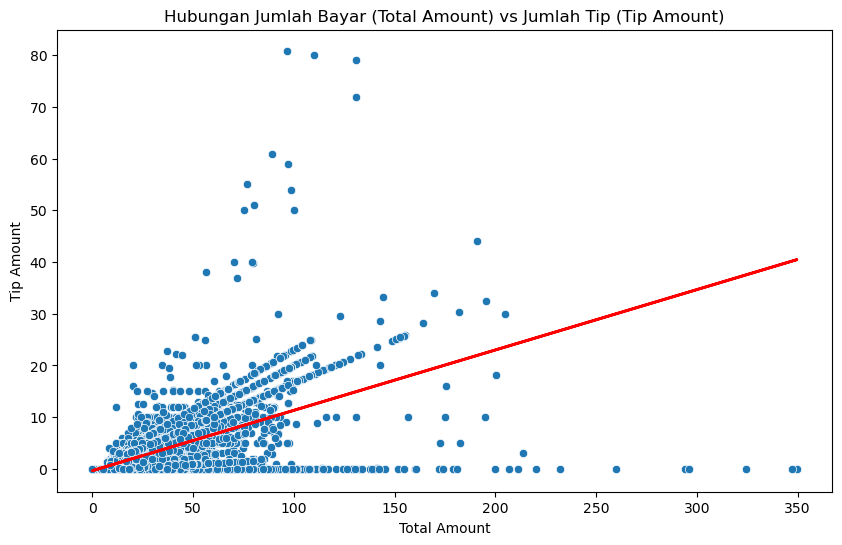

In [70]:
import scipy.stats as stats

# Uji hipotesis korelasi
correlation, p_value = stats.pearsonr(df['total_amount'], df['tip_amount'])
print(f'Korelasi antara Total Amount dan Tip Amount: {correlation:.2f}')
print(f'P-value: {p_value:.2f}')


# Regresi Linier
from sklearn.linear_model import LinearRegression

X = df[['total_amount']]
y = df['tip_amount']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f'Regresi Linier: Tip Amount = {slope:.2f} * Total Amount + {intercept:.2f}')

# Visualisasi Regresi Linier
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_amount', y='tip_amount', data=df)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Hubungan Jumlah Bayar (Total Amount) vs Jumlah Tip (Tip Amount)')
plt.xlabel('Total Amount')
plt.ylabel('Tip Amount')
plt.show()

# Analisis Deskriptif
total_amount_stats = df['total_amount'].describe()
tip_amount_stats = df['tip_amount'].describe()


## Analisis:

Berdasarkan visualisasi dan output yang ditampilkan, dapat disimpulkan bahwa :

**1. Statistik Deskriptif:**
   - Rata-rata jumlah total bayar per perjalanan adalah sekitar 23.88 USD, dengan standar deviasi sekitar 14.36 USD, menunjukkan variasi yang cukup besar.
   - Jumlah total bayar berkisar dari 0.00 USD hingga 349.60 USD, dengan sebagian besar perjalanan memiliki total bayar di kisaran 15.00 USD hingga 28.02 USD.
   - Rata-rata jumlah tip yang diberikan oleh penumpang adalah sekitar 2.43 USD, dengan standar deviasi sekitar 2.97 USD, menunjukkan variasi yang cukup besar.
   - Jumlah tip berkisar dari 0.00 USD hingga 80.88 USD, dengan sebagian besar tip berada dalam kisaran yang lebih rendah.

**2. Scatter Plot:**
   - Scatter plot antara jumlah total bayar dan jumlah tip menunjukkan tren positif, yang dapat diinterpretasikan sebagai peningkatan jumlah tip seiring dengan peningkatan jumlah total bayar.

**3. Korelasi dan Uji Hipotesis:**
   - Koefisien korelasi antara jumlah total bayar dan jumlah tip adalah 0.56, menunjukkan hubungan positif yang cukup kuat antara keduanya.
   - P-value yang sangat rendah (0.00) menunjukkan bahwa kita memiliki bukti statistik yang sangat kuat untuk menolak hipotesis nol bahwa tidak ada korelasi antara jumlah total bayar dan jumlah tip.

**Kesimpulan:**
- Terdapat hubungan positif yang signifikan antara jumlah total bayar dan jumlah tip.
- Semakin besar jumlah total bayar, semakin besar juga jumlah tip yang diberikan oleh penumpang kepada pengemudi taksi.

# **Kesimpulan**

#### 1. Perbandingan Kepuasan Pelanggan antara VendorID 1 dan VendorID 2

1. **Total Jarak Perjalanan:**
   - VendorID 2 memiliki total jarak perjalanan lebih tinggi dibandingkan dengan VendorID 1.
   - Hari paling aktif untuk keduanya adalah Selasa, sedangkan Sabtu memiliki jumlah perjalanan terendah untuk VendorID1 dan Minggu di VendorID 2.

2. **Total Pendapatan:**
   - VendorID 2 memiliki total pendapatan lebih tinggi dibandingkan dengan VendorID 1.
   - Hari dengan pendapatan tertinggi untuk keduanya adalah Selasa, sedangkan Sabtu memiliki jumlah pendapatan terendah untuk VendorID1 dan Minggu di VendorID 2.

3. **Total Tip:**
   - VendorID 2 mendapatkan total tip lebih tinggi dibandingkan dengan VendorID 1.
   - Hari dengan tip tertinggi untuk keduanya adalah Selasa, sedangkan  memiliki jumlah tip terendah untuk VendorID1 dan Minggu di VendorID 2.

#### 2. Pola Perjalanan Taksi dan Tren Permintaan Penumpang di Januari 2023

1. **Pola Perjalanan Berdasarkan Jumlah Penumpang:**
   - Puncak aktivitas terjadi pada rentang waktu 15.00 - 18.00, dengan Selasa memiliki jumlah penumpang tertinggi.
   - Aktivitas penumpang cenderung lebih rendah pada akhir pekan, terutama Sabtu dan Minggu.

2. **Tren Permintaan Penumpang per Jam:**
   - Puncak permintaan terjadi pada jam 17.00-18.00, mencapai 5530 penumpang.
   - Jam-jam sibuk lainnya adalah 07.00-08.00, 08.00-09.00, dan 15.00-16.00.
   - Permintaan menurun pada dini hari dan meningkat pada pagi hingga sore hari.
   - Pentingnya perencanaan dan penugasan armada pada jam puncak, terutama pada pukul 17.00-18.00.
   
3. **Tren Permintaan Penumpang per Jam di Hari Kerja dan Akhir Pekan:**
   **Weekdays:**
   - Puncak permintaan pada jam 17.00-18.00 dengan 4322 penumpang.
   - Jam-jam puncak lainnya (08.00-09.00, 09.00-10.00, 16.00-17.00) juga tinggi.
   - Permintaan pagi (06.00-09.00) relatif tinggi.

   **Weekend:**
   - Puncak permintaan pada jam 15.00-16.00 dengan 1299 penumpang.
   - Jam-jam sibuk lainnya (10.00-11.00, 11.00-12.00, 14.00-15.00) juga tinggi.
   - Peningkatan signifikan pada pagi hari (06.00-09.00) dibanding weekdays. 

4. **Tren Permintaan Penumpang per Hari:**
   - Perbedaan pola antara weekdays dan weekend menunjukkan potensi waktu sibuk yang berbeda pada setiap periode.
   **Tren Permintaan Penumpang per Hari:**
   1. **Tren Harian:**
   - Jumlah penumpang tertinggi terjadi pada hari Selasa dengan 11484 penumpang.
   - Pada hari Sabtu dan Minggu, jumlah penumpang cenderung lebih rendah dibandingkan dengan hari-hari kerja.

   2. **Perbedaan Antara Hari Kerja dan Akhir Pekan:**
   - Jumlah penumpang pada hari Senin hingga Jumat (hari kerja) cenderung lebih tinggi dibandingkan dengan Sabtu dan Minggu (akhir pekan).

   3. **Tren Mingguan:**
   - Grafik menunjukkan tren mingguan yang konsisten, dengan fluktuasi tertentu di sepanjang minggu. 

#### 3. Hubungan antara Jumlah Bayar(total_amount) dan Jumlah Tip (total_tip)
   - Rata-rata total bayar per perjalanan adalah sekitar 23.88 USD, dengan variasi yang signifikan, memiliki standar deviasi sekitar 14.36 USD.
   - Mayoritas perjalanan memiliki total bayar di kisaran 15.00 USD hingga 28.02 USD.
   - Rata-rata jumlah tip yang diberikan adalah sekitar 2.43 USD, dengan variasi yang cukup besar, ditunjukkan oleh standar deviasi sekitar 2.97 USD.
   - Jumlah tip berkisar dari 0.00 USD hingga 80.88 USD.
   - Scatter plot antara total bayar dan tip menunjukkan tren positif yang kuat, mengindikasikan bahwa semakin besar total bayar, semakin besar juga tip yang diberikan.
   - Korelasi sebesar 0.56 menegaskan adanya hubungan positif yang kuat antara total bayar dan tip.
   - P-value yang sangat rendah (0.00) memberikan bukti statistik yang kuat untuk menolak hipotesis nol, sehingga kita dapat menyimpulkan bahwa korelasi antara total bayar dan tip adalah signifikan secara statistik.
   - Kesimpulan akhir: Semakin besar total bayar, semakin besar juga tip yang diberikan oleh penumpang kepada pengemudi taksi.

# **Rekomendasi**

### Rekomendasi untuk Meningkatkan Kepuasan Pelanggan dan Optimalisasi Layanan Taksi:

#### VendorID 1:

1. **Peningkatan Pelayanan pada Jam Puncak:**
   - *Saran:* Tingkatkan pelayanan pada jam-jam puncak, terutama di hari Selasa.
   - *Langkah Aksi:* Sesuaikan penempatan armada dan jadwal pengemudi untuk memaksimalkan ketersediaan selama jam-jam dengan jumlah perjalanan dan pendapatan tertinggi.

2. **Program Insentif pada Jam-Jam Rendah:**
   - *Saran:* Fokus pada jam-jam dengan potensi pertumbuhan, terapkan program insentif atau promosi.
   - *Langkah Aksi:* Implementasikan insentif khusus untuk merangsang penggunaan taksi VendorID 1 pada jam-jam tertentu.

3. **Analisis Kualitas Layanan pada Hari Sabtu:**
   - *Saran:* Evaluasi kualitas layanan pada hari Sabtu yang memiliki performa rendah.
   - *Langkah Aksi:* Lakukan survei kepuasan pelanggan khusus pada hari Sabtu untuk mengidentifikasi masalah dan tingkatkan layanan.

#### VendorID 2:

1. **Optimasi Ketersediaan Armada pada Hari Selasa:**
   - *Saran:* Pertahankan kualitas pelayanan optimal meskipun ketersediaan tinggi pada hari Selasa.
   - *Langkah Aksi:* Perbaiki sistem penjadwalan untuk menjaga kualitas layanan. Evaluasi performa pengemudi dan tambahan layanan jika diperlukan.

2. **Maksimalkan Pendapatan pada Jam-Jam Puncak:**
   - *Saran:* Fokus pada peningkatan pendapatan dan tip, terutama pada pukul 17.00 di hari Selasa.
   - *Langkah Aksi:* Rancang program promosi atau insentif untuk menarik lebih banyak penumpang selama jam-jam puncak.

3. **Pengoptimalan Jam Kerja Pengemudi:**
   - *Saran:* Maksimalkan potensi pendapatan dengan mengelola jam kerja pengemudi berdasarkan pola pendapatan harian dan jam-jam puncak.
   - *Langkah Aksi:* Sesuaikan jadwal kerja pengemudi dengan pola pendapatan dan pastikan insentif tambahan untuk pengemudi yang bekerja pada jam-jam puncak.

### Stakeholder Berdasarkan Pola Perjalanan dan Permintaan Penumpang:

1. **Optimasi Armada dan Pengemudi:**
   - *Saran:* Tingkatkan jumlah armada dan pengemudi selama jam-jam puncak pada rentang waktu 15.00 - 18.00.
   - *Langkah Aksi:* Pastikan ketersediaan maksimal armada dan pengemudi untuk memenuhi tingginya permintaan penumpang.

2. **Promosi dan Insentif pada Jam Sibuk:**
   - *Saran:* Terapkan program promosi atau insentif pada jam-jam potensial, seperti pada rentang waktu 08.00 - 10.00.
   - *Langkah Aksi:* Rancang insentif atau diskon khusus untuk meningkatkan penggunaan taksi selama jam-jam sibuk.

3. **Penyesuaian Tarif dan Diskon pada Jam Tertentu:**
   - *Saran:* Implementasikan tarif dinamis atau diskon pada jam-jam lengang untuk memicu permintaan.
   - *Langkah Aksi:* Evaluasi dan terapkan kebijakan tarif yang lebih fleksibel atau diskon pada rentang waktu yang kurang diminati.

4. **Pelatihan Pengemudi pada Pola Tren Harian:**
   - *Saran:* Berikan pelatihan kepada pengemudi tentang pola tren harian, terutama pada jam-jam sibuk.
   - *Langkah Aksi:* Lakukan pelatihan mengenai strategi optimal dalam menghadapi tingginya permintaan pada jam-jam tertentu.

5. **Promo Menarik pada Hari-Hari yang Kurang Aktif:**
   - *Saran:* Rancang promo menarik untuk meningkatkan penggunaan taksi pada hari Sabtu dan Minggu.
   - *Langkah Aksi:* Implementasikan promosi khusus untuk merangsang penggunaan taksi pada akhir pekan, seperti diskon akhir pekan.

### Stakeholder Berdasarkan Analisis Hubungan Jumlah Total Bayar dan Tip:

1. **Promosi Kesadaran Tip:**
   - *Saran:* Promosikan kebijakan memberikan tip secara positif kepada penumpang.
   - *Langkah Aksi:* Gunakan pesan promosi di kendaraan atau aplikasi untuk meningkatkan kesadaran penumpang tentang pentingnya memberikan tip kepada pengemudi yang memberikan pelayanan baik.

2. **Edukasi Pengemudi tentang Kualitas Pelayanan:**
   - *Saran:* Berikan pelatihan kepada pengemudi tentang pentingnya pelayanan yang baik untuk mendorong penumpang memberikan tip.
   - *Langkah Aksi:* Adakan sesi pelatihan reguler yang fokus pada aspek-aspek kualitas pelayanan